# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `9` | `Questions`

> Hi Team, 👋

> Having reviewed your submissions so far, some of the questions below have been crafted specifically to enhance your grasp of the course material.

> I trust that the exercises below will support your review and understanding of the course content. 🤞

#### <font color = "green"> Please submit your answers via the eLearn submission folder. Again, you may submit incomplete answers. (Answer as fully as you can. This will help me to see where you stand.)

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [35]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. 
    
### The first question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).
    
### <font color = green> Using the 102 tickers below, and what you have learned in class, run the analysis and develop a dendrogram. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    According to the dendrogram, which of the stocks are most correlated? 
    
    Also based on the dendrogram, please identify two stocks that are not well correlated.

In [36]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

nasdaq100_components

,Company,Symbol,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Vertex Pharmaceuticals,VRTX,Health Care,Biotechnology
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities


In [37]:
list_of_tickers = nasdaq100_components['Symbol'].to_list()

prices = (
    yf.download(
        list_of_tickers,
        start = '2009-12-31',
        end = '2019-12-31'
    )
    ['Adj Close']
)

[*********************100%***********************]  101 of 101 completed

6 Failed downloads:
['ARM', 'CEG', 'DASH', 'GEHC', 'GFS', 'ABNB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-12-31 -> 2019-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262235600, endDate = 1577768400")')


### Below are the lines of code that lead to an answer:

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

In [39]:
print("Missing Values? =", 
      prices
          .isnull()
          .values
          .any()
     )

missing_fractions = \
    prices \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)
    
missing_fractions.head(10)

Missing Values? = True


Ticker
ARM     1.000000
DASH    1.000000
CEG     1.000000
GEHC    1.000000
ABNB    1.000000
GFS     1.000000
DDOG    0.971781
CRWD    0.944356
MRNA    0.893879
PDD     0.856916
dtype: float64

In [40]:
drop_list =\
    sorted(list(missing_fractions
                [missing_fractions > 0.3]
                .index)
           )
print(drop_list)
prices =\
    prices \
    .drop(labels= drop_list, 
          axis=1)

['ABNB', 'ARM', 'CDW', 'CEG', 'CRWD', 'DASH', 'DDOG', 'GEHC', 'GFS', 'KHC', 'MDB', 'MRNA', 'PDD', 'PYPL', 'TEAM', 'TTD', 'ZS']


In [41]:
prices = prices.fillna(method = "ffill")
prices.head()

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31 00:00:00+00:00,6.355580,36.779999,22.289679,26.432920,25.410000,19.625311,10.882671,9.68,40.100685,6.7260,...,22.280001,12.450398,NaN,10.05,17.726282,29.176895,42.849998,15.671947,NaN,12.763040
2010-01-04 00:00:00+00:00,6.454506,37.090000,22.353197,26.439091,25.670000,19.709921,11.163715,9.70,40.915897,6.6950,...,22.440001,13.005198,NaN,10.40,17.692276,28.762562,44.240002,15.840572,NaN,12.678840
2010-01-05 00:00:00+00:00,6.465664,37.700001,22.317913,26.297117,25.280001,19.484282,11.077842,9.71,40.561459,6.7345,...,22.250000,13.037835,NaN,10.47,17.590240,28.955273,42.779999,16.463976,NaN,12.528474
2010-01-06 00:00:00+00:00,6.362821,37.619999,22.275564,26.235376,25.340000,19.681713,11.054420,9.57,40.256641,6.6125,...,22.209999,12.156679,NaN,10.44,17.460995,29.331066,42.029999,16.709249,NaN,12.552530
2010-01-07 00:00:00+00:00,6.351057,36.889999,22.099102,26.223045,25.480000,19.850952,10.937318,9.47,39.888042,6.5000,...,22.150000,12.270903,NaN,10.39,17.515423,29.282887,41.500000,16.699030,NaN,12.498401


In [42]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    prices
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [43]:
returns["Volatility"] =\
(    
     prices
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns.copy()

In [44]:
returns

,Returns,Volatility
Ticker,,
AAPL,0.274758,0.257517
ADBE,0.258871,0.280621
ADI,0.191678,0.255782
ADP,0.192621,0.181111
ADSK,0.256559,0.341766
...,...,...
VRSK,0.177849,0.192080
VRTX,0.267808,0.481586
WBD,0.116019,0.290139


In [45]:
# You may format the data as a numpy array to feed into the K-Means algorithm

data =\
( 
    np 
    .asarray([np.asarray(returns['Returns']),
              np.asarray(returns['Volatility'])
             ]
            )
    .T
)

In [46]:
data

array([[0.275, 0.258],
       [0.259, 0.281],
       [0.192, 0.256],
       [0.193, 0.181],
       [0.257, 0.342],
       [0.153, 0.16 ],
       [0.214, 0.303],
       [0.316, 0.573],
       [0.192, 0.231],
       [0.31 , 0.31 ],
       [0.207, 0.239],
       [0.299, 0.318],
       [0.362, 0.34 ],
       [0.148, 0.222],
       [0.229, 0.339],
       [0.271, 0.305],
       [0.065, 0.343],
       [0.207, 0.233],
       [0.282, 0.267],
       [0.3  , 0.27 ],
       [0.211, 0.22 ],
       [0.203, 0.179],
       [0.255, 0.223],
       [0.126, 0.251],
       [0.306, 0.281],
       [0.206, 0.269],
       [0.306, 0.213],
       [0.142, 0.278],
       [0.211, 0.262],
       [0.44 , 0.47 ],
       [0.238, 0.342],
       [0.052, 0.189],
       [0.306, 0.388],
       [0.187, 0.263],
       [0.327, 0.39 ],
       [0.163, 0.28 ],
       [0.176, 0.245],
       [0.176, 0.243],
       [0.199, 0.204],
       [0.262, 0.257],
       [0.321, 0.41 ],
       [0.169, 0.246],
       [0.252, 0.238],
       [0.2

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler().fit(data)

In [49]:
rescaledDataset =\
(
    pd
    .DataFrame(scaler.fit_transform(data),
               columns = returns.columns, 
               index = returns.index)
)
rescaledDataset.head()

,Returns,Volatility
Ticker,,
AAPL,0.463241,-0.425810
ADBE,0.266776,-0.176348
ADI,-0.564210,-0.444542
ADP,-0.552546,-1.250780
ADSK,0.238176,0.483849


In [50]:
# summarize transformed data
X = rescaledDataset
X.head()

,Returns,Volatility
Ticker,,
AAPL,0.463241,-0.425810
ADBE,0.266776,-0.176348
ADI,-0.564210,-0.444542
ADP,-0.552546,-1.250780
ADSK,0.238176,0.483849


### <font color = red> Answer 1 is presented in the cell below: </font>

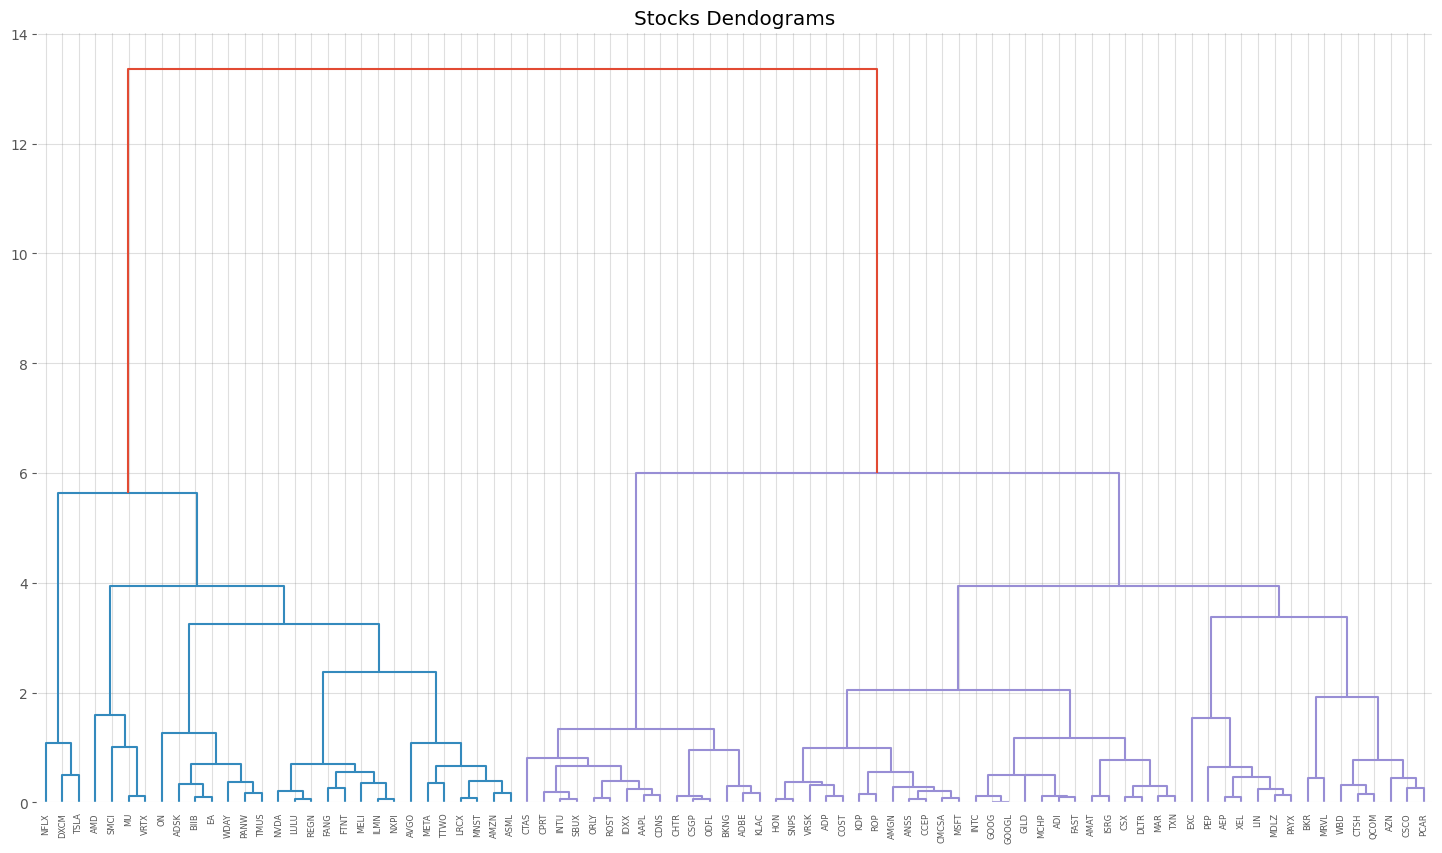

In [51]:
#Calulate linkage
Z = linkage(X, 
            method = "ward")
Z[0]

# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

## 👇 <font color = "purple"> Bigger Question 2. ### 

### The second question asks you to run a principal components analysis (PCA) for portfolio management. Begin your analysis with all the above stocks. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period 
    to "the market", assess the performance of other portfolios that capture different 
    return patterns.
    
> Please use 75% of your data for PCA and 25% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 10 years between 2010 and 2019.

### Below are the lines of code that lead to an answer:

In [52]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

In [53]:
PCA_prices = (
    prices
    .dropna(axis = 0)
)

PCA_prices.head(1)

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-12 00:00:00+00:00,19.073496,31.940001,29.108305,39.128414,31.200001,28.465929,9.118296,2.74,61.063473,12.118,...,32.099998,19.385416,1.842667,11.18,19.563883,45.316692,53.529999,31.037302,48.689999,18.642824


In [54]:
Daily_Linear_Return =\
(
    PCA_prices
    .pct_change(1)
)

Daily_Linear_Return.head(2)

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-15 00:00:00+00:00,0.00802,0.01221,0.011808,0.010117,0.022436,0.008839,0.005505,0.00365,0.026429,0.007509,...,0.002492,-0.046296,-0.011216,0.028623,0.034457,-0.000851,-0.005417,0.013006,0.066749,0.004345


In [55]:
# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

In [56]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [57]:
scaler

StandardScaler()

In [58]:
scaled_PCA_prices =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_PCA_prices.describe()

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL
count,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,925.000000,9.250000e+02,925.000000,925.000000,9.250000e+02,9.250000e+02,...,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02
mean,-7.681543e-18,7.681543e-18,-2.304463e-17,-4.608926e-17,0.000000,-1.920386e-18,0.000000,0.000000,-3.840772e-18,1.152231e-17,...,-1.536309e-17,2.304463e-17,1.920386e-18,2.688540e-17,-3.840772e-17,-1.920386e-17,-1.728347e-17,-2.208444e-17,-1.152231e-17,-7.681543e-18
std,1.000541e+00,1.000541e+00,1.000541e+00,1.000541e+00,1.000541,1.000541e+00,1.000541,1.000541,1.000541e+00,1.000541e+00,...,1.000541e+00,1.000541e+00,1.000541e+00,1.000541e+00,1.000541e+00,1.000541e+00,1.000541e+00,1.000541e+00,1.000541e+00,1.000541e+00
min,-3.408806e+00,-3.780728e+00,-3.704852e+00,-3.915165e+00,-3.594113,-3.014425e+00,-3.684507,-3.699442,-3.536507e+00,-4.248706e+00,...,-3.487877e+00,-3.475307e+00,-3.783511e+00,-3.463990e+00,-3.283576e+00,-3.230385e+00,-4.304826e+00,-3.253405e+00,-3.539489e+00,-3.331201e+00
25%,-5.407175e-01,-6.177271e-01,-6.029394e-01,-6.082190e-01,-0.593774,-6.287714e-01,-0.597650,-0.601937,-6.023063e-01,-6.098707e-01,...,-6.243259e-01,-6.065092e-01,-5.555687e-01,-5.918118e-01,-5.843639e-01,-5.914024e-01,-5.945932e-01,-5.300314e-01,-5.556095e-01,-6.205924e-01
50%,-1.999355e-02,-5.138447e-02,-1.782492e-02,-3.577486e-02,0.006732,3.515545e-02,-0.000158,-0.047406,-1.942075e-02,-5.625771e-02,...,8.132220e-03,-2.915895e-03,-3.570321e-02,-2.970402e-02,-6.080969e-03,7.822569e-03,-2.288763e-02,-3.535232e-02,-2.433447e-03,2.098640e-02
75%,6.288453e-01,6.090363e-01,5.990583e-01,6.047622e-01,0.576254,6.377179e-01,0.608722,0.532031,5.813305e-01,6.214362e-01,...,6.257117e-01,5.909144e-01,6.112843e-01,6.036531e-01,6.221584e-01,6.068504e-01,5.967929e-01,5.897612e-01,6.041864e-01,6.198081e-01
max,3.644318e+00,3.415722e+00,3.748745e+00,3.632123e+00,3.794460,3.322447e+00,3.008432,4.051760,3.399538e+00,4.133310e+00,...,3.505238e+00,3.726149e+00,3.641052e+00,3.315185e+00,3.540650e+00,3.850131e+00,3.805075e+00,3.310138e+00,3.713623e+00,3.302678e+00


In [59]:
prop =\
    int(len(scaled_PCA_prices) * 0.75)

X_Train = scaled_PCA_prices[    : prop] # First 80% of the data
X_Test  = scaled_PCA_prices[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

pca = PCA()

PrincipalComponent = pca.fit(X_Train)
PrincipalComponent

PCA()

In [60]:
stock_tickers =\
(
 scaled_PCA_prices
 .columns
 .values
)

stock_tickers

array(['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'AMAT', 'AMD', 'AMGN',
       'AMZN', 'ANSS', 'ASML', 'AVGO', 'AZN', 'BIIB', 'BKNG', 'BKR',
       'CCEP', 'CDNS', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSGP',
       'CSX', 'CTAS', 'CTSH', 'DLTR', 'DXCM', 'EA', 'EXC', 'FANG', 'FAST',
       'FTNT', 'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INTC',
       'INTU', 'ISRG', 'KDP', 'KLAC', 'LIN', 'LRCX', 'LULU', 'MAR',
       'MCHP', 'MDLZ', 'MELI', 'META', 'MNST', 'MRVL', 'MSFT', 'MU',
       'NFLX', 'NVDA', 'NXPI', 'ODFL', 'ON', 'ORLY', 'PANW', 'PAYX',
       'PCAR', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST', 'SBUX', 'SMCI',
       'SNPS', 'TMUS', 'TSLA', 'TTWO', 'TXN', 'VRSK', 'VRTX', 'WBD',
       'WDAY', 'XEL'], dtype=object)

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

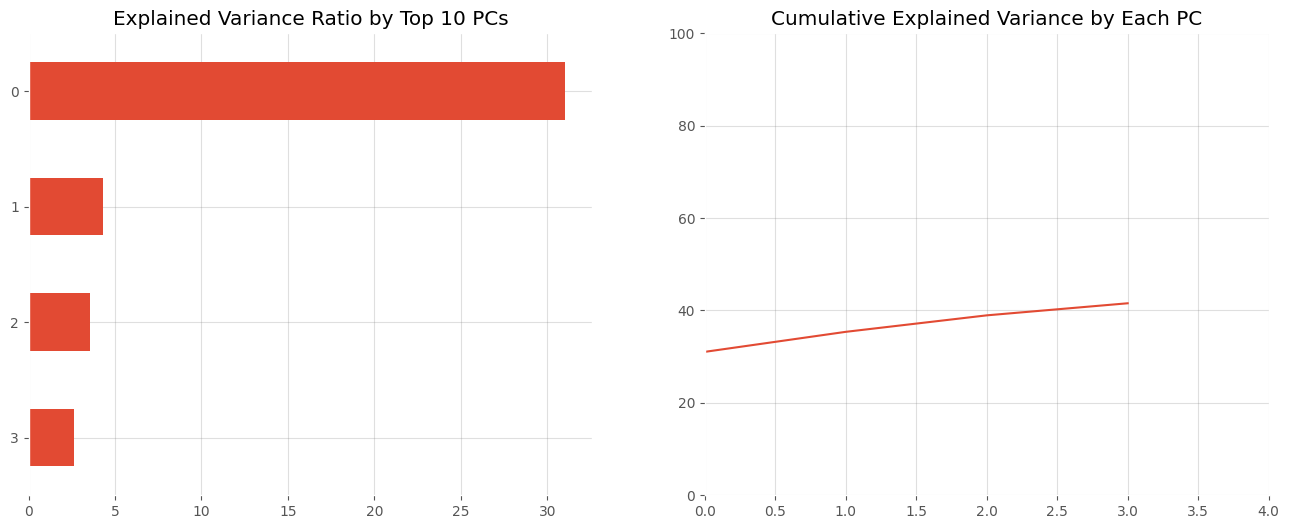

In [61]:
NumEigenValues = 4

fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, NumEigenValues),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, NumEigenValues),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [62]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

weights = PCWeights()

In [63]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [64]:
def valid_backtest_PCA_porfolios(eigen):
    
    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    # Sanity Check: Ensure the order of tickers in X_Test_Raw matches the order in eigen
    if not list(eigen_prtfi.index) == list(X_Test_Raw.columns): 
        raise ValueError("Sanity check failed: Mismatch in number of tickers between X_Test_Raw and eigen.")
    else:
        print("Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.")
    
    # Let's directly compute the dot product without sorting
    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw, eigen)
    )
    
    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

### <font color = red> Answer 2 is presented in the cell below: </font>

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = 59.09%
Volatility = 11.58%
Sharpe = 5.10


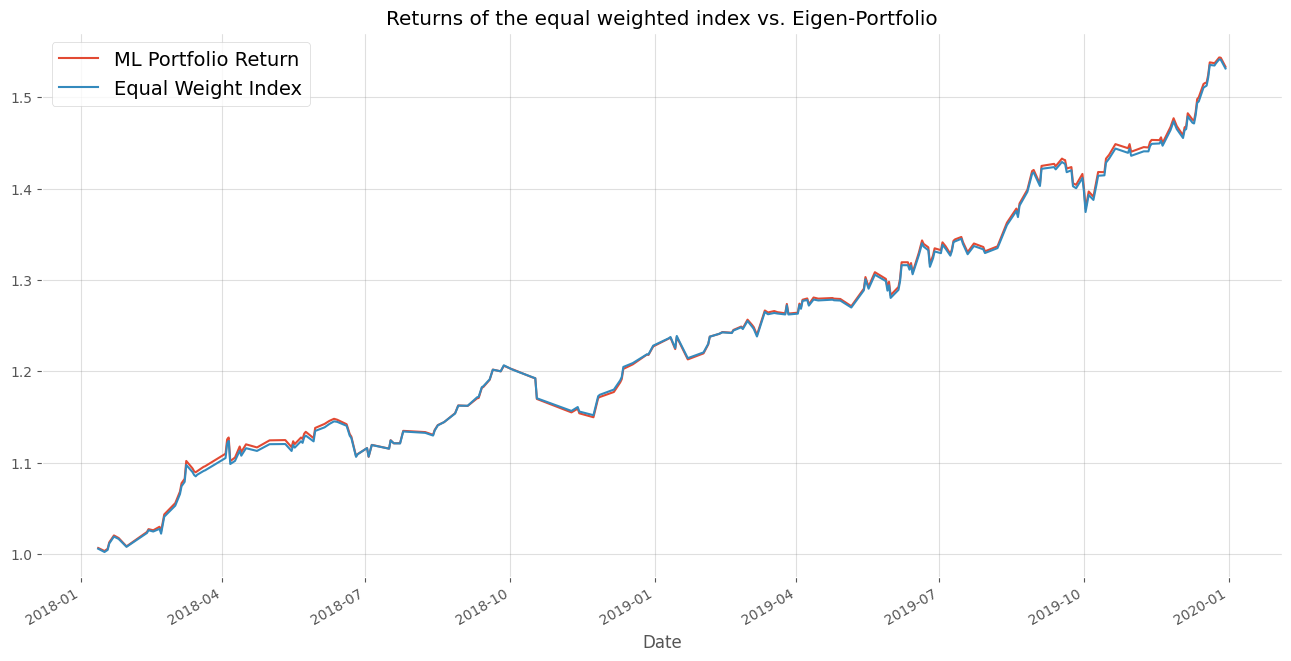

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -68.20%
Volatility = 102.64%
Sharpe = -0.66


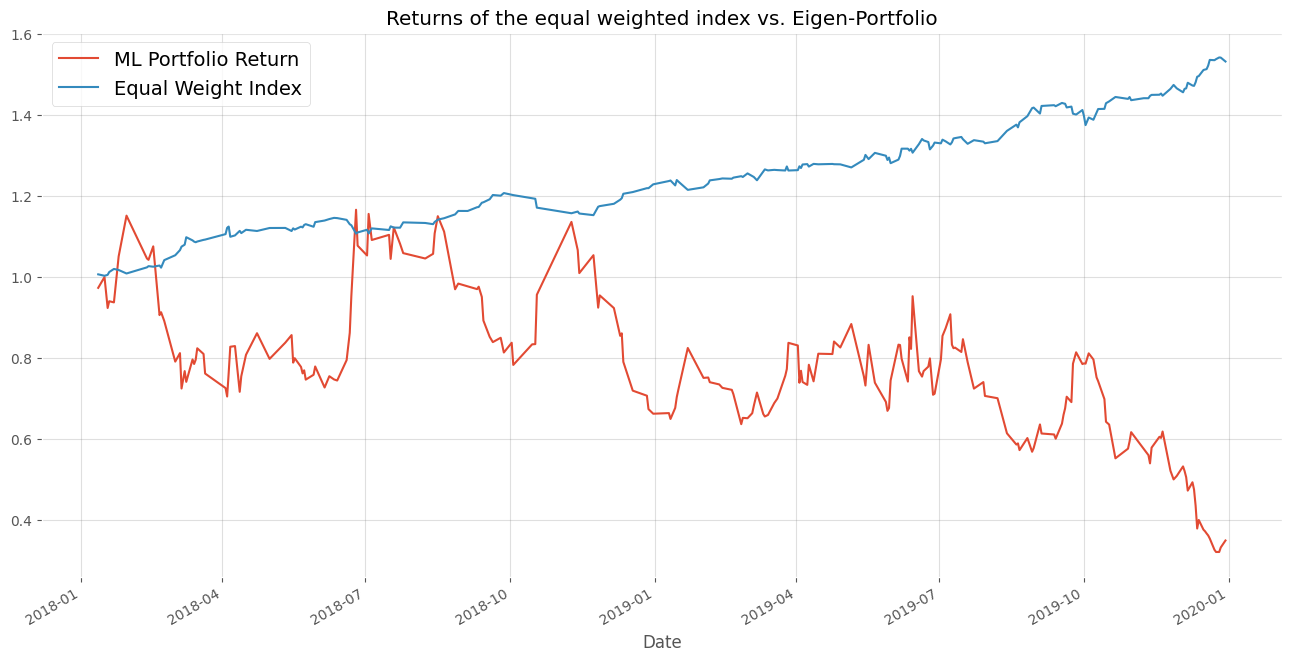

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -27.85%
Volatility = 165.92%
Sharpe = -0.17


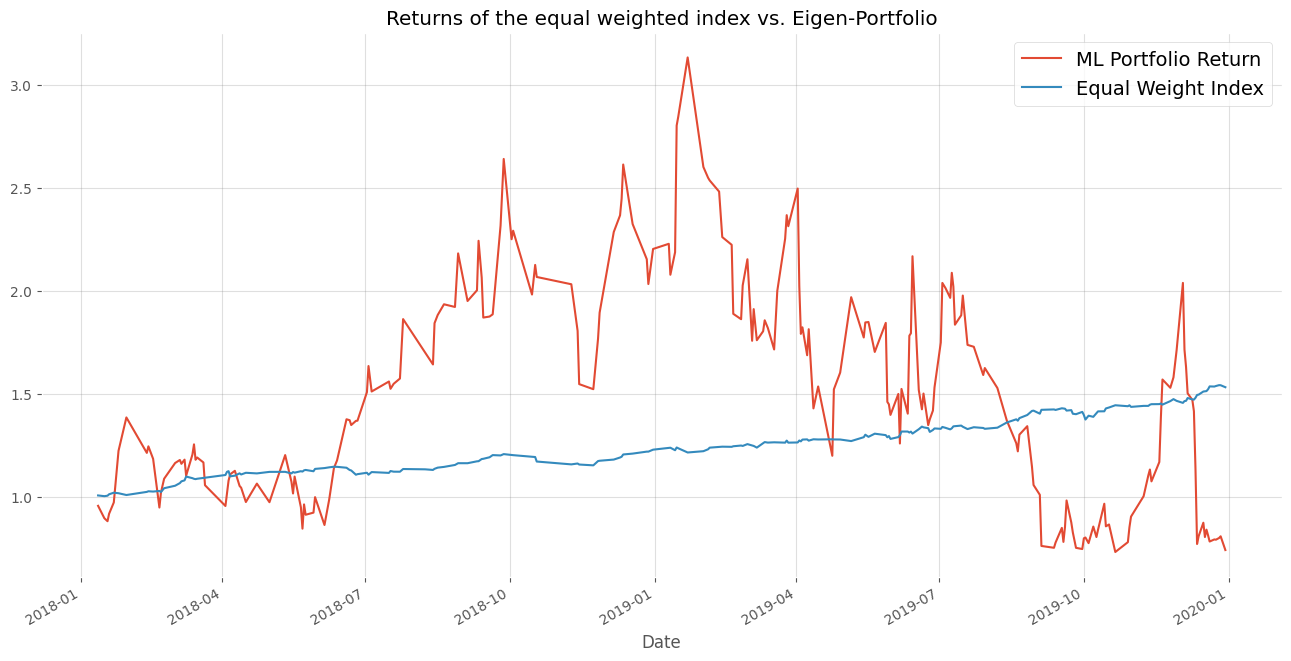

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -81.91%
Volatility = 96.73%
Sharpe = -0.85


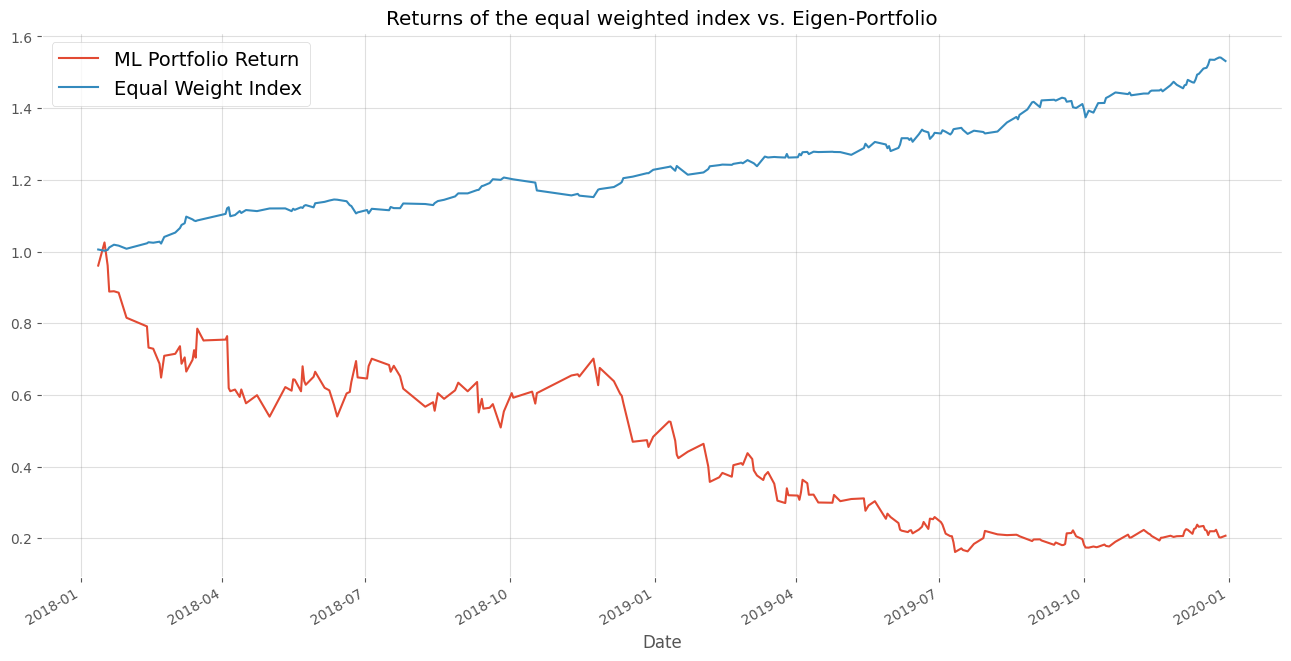

In [65]:
for i in range(NumEigenValues):
    valid_backtest_PCA_porfolios(eigen = weights[i])

### <font color = blue> 👉 Questions 3. Using `yfinance`, extract the stock prices of the following ticker symbols, between July 2015 and June 2019.

- General Motors `GM`
- Marriott `MAR`
- Pfizer `PFE`
- ExxonMobil `XOM`
- The Walt Disney Company `DIS`
- Bank of America `BAC`
- Proctor & Gamble `PG`
- Hilton `HLT`
- Walmart `WMT`
- Twitter `TWTR`

### Then, calculate simple daily percentage changes in the stock prices, and store them into an object, printing the results into an output cell.

### Below are the lines of code that lead to an answer:

In [66]:
class ticker_info:
    def __init__(
            self,
            tickers: list[str]
        ) -> None:
        """
        Retrieves ticker related information

        Parameters
        ----------
        tickers : list[str]
            List of tickers
        """
        
        self.tickers = tickers
        self.price = None

    def download(
        self, 
        start_date: str, 
        end_date: str,
        variable: str
    ) -> None:
        """
        Download Adj Close from Yahoo Finance
        Updates self.price variable

        Parameters
        ----------
        start_date : str
            Start Date
        end_date : str
            End Date
        variable : str
            Variable to download ('Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
        """
        self.price = (
            yf.download(
                tickers = self.tickers, 
                start = start_date, 
                end = end_date
            )
            [variable]
        )
        if len(self.tickers) == 1:
            self.price = (
                self.price
                .to_frame()
                .rename(
                    columns = {
                        variable : self.tickers[0]
                    }
                )
            )
    
    def compute_returns(
        self,
        return_type: str
    ) -> pd.DataFrame:
        """
        Calculate Returns

        Parameters
        ----------
        return_type : str
            'simple' or 'log'
            
        Returns
        -------
        pd.DataFrame
            Returns DF based on specified return calculation

        Raises
        ------
        TypeError
            If price variable is None
        """
        return_type = return_type.upper()
        
        if self.price is None:
            raise ValueError('Price data is not available. Run `download()` first')
        
        if return_type == 'SIMPLE':
            returns = (
                self.price
                .pct_change()
            )
        elif return_type == 'LOG':
            returns = (
                np.log(
                    self.price
                )
                .diff()
            )
        else:
            raise ValueError('Invalid return type. Use "simple" or "log".')
        
        return returns

In [67]:
ticker_list = ['GM', 'MAR', 'PFE', 'XOM', 'DIS', 'BAC', 'PG', 'HLT', 'WMT']

base = (
    ticker_info(
        tickers = ticker_list
    )
)

base.download(
    start_date = '2015-06-30',
    end_date = '2019-06-30',
    variable = 'Adj Close'
)

[*********************100%***********************]  9 of 9 completed


### <font color = red> Answer 3 is presented in the cell below: </font>

In [68]:
returns = (
    base
    .compute_returns(
        return_type = 'simple'
    )
)

returns.head()

Ticker,BAC,DIS,GM,HLT,MAR,PFE,PG,WMT,XOM
Date,,,,,,,,,
2015-06-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 00:00:00+00:00,0.011751,0.014540,-0.008701,0.008348,0.008066,0.004772,0.018916,0.013394,-0.009976
2015-07-02 00:00:00+00:00,-0.011033,-0.001390,0.005751,0.000000,-0.002534,-0.009498,0.002634,-0.000278,0.009348
2015-07-06 00:00:00+00:00,-0.005285,0.006349,-0.017454,0.000720,-0.006551,-0.003596,0.001501,0.009324,-0.007338
2015-07-07 00:00:00+00:00,-0.014758,0.012100,0.006432,0.001799,0.015207,0.014436,0.020862,0.017372,0.004120


### <font color = blue> 👉 Questions 4. Using a box-and-whisker plot, compare the performance of the stocks over the given period of time. Find the stock with the highest variability and risk, based on the visualization.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 4 is presented in the cell below: </font>

<Axes: >

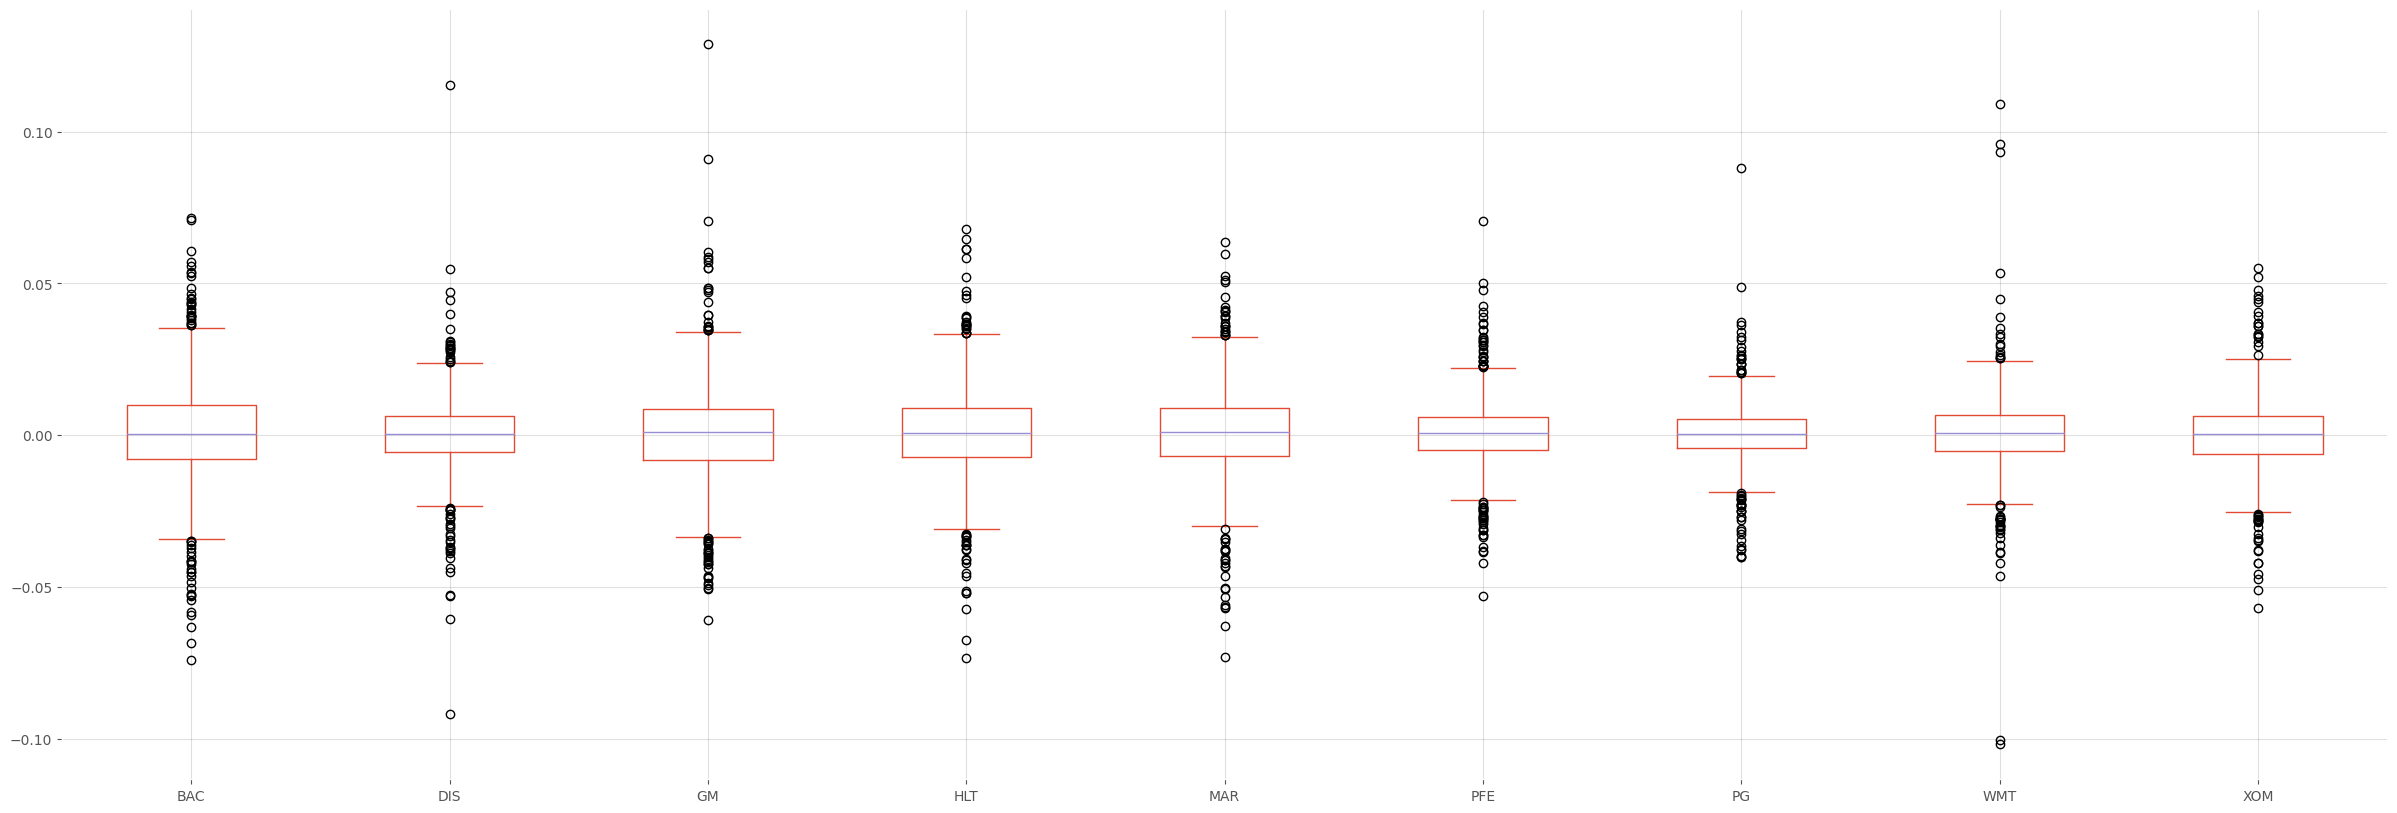

In [69]:
returns.plot(
    figsize = [30,10],
    kind = 'box'
)

### <font color = blue> 👉 Questions 5. Create your own function to compare daily percentage changes between stocks, using a scatter plot and its distribution relative to a perfect diagonal (regression line). 

### Assess which of the following pairs seem to show the closest relationships.

1. ExxonMobil (`XOM`) and General Motors (`GM`)
2. Twitter (`TWTR`) and The Walt Disney Company (`DIS`)
3. Marriott (`MAR`) and Hilton (`HLT`)
4. Pfeizer (`PFE`) and Proctor & Gamble (`PG`)
5. Bank of America (`BAC`) and Walmart (`WMT`)

### Upon completion of the above, please execute more tasks for the sake of this question. 

### As you have learned in class, if you wish to look for all combinations of stocks you can use the scatter matrix graph provided by the `pandas` module. Create the scatter matrix, along with a Kernel Density Estimation on the diagonal.

### Below are the lines of code that lead to an answer:

In [70]:
import seaborn as sns

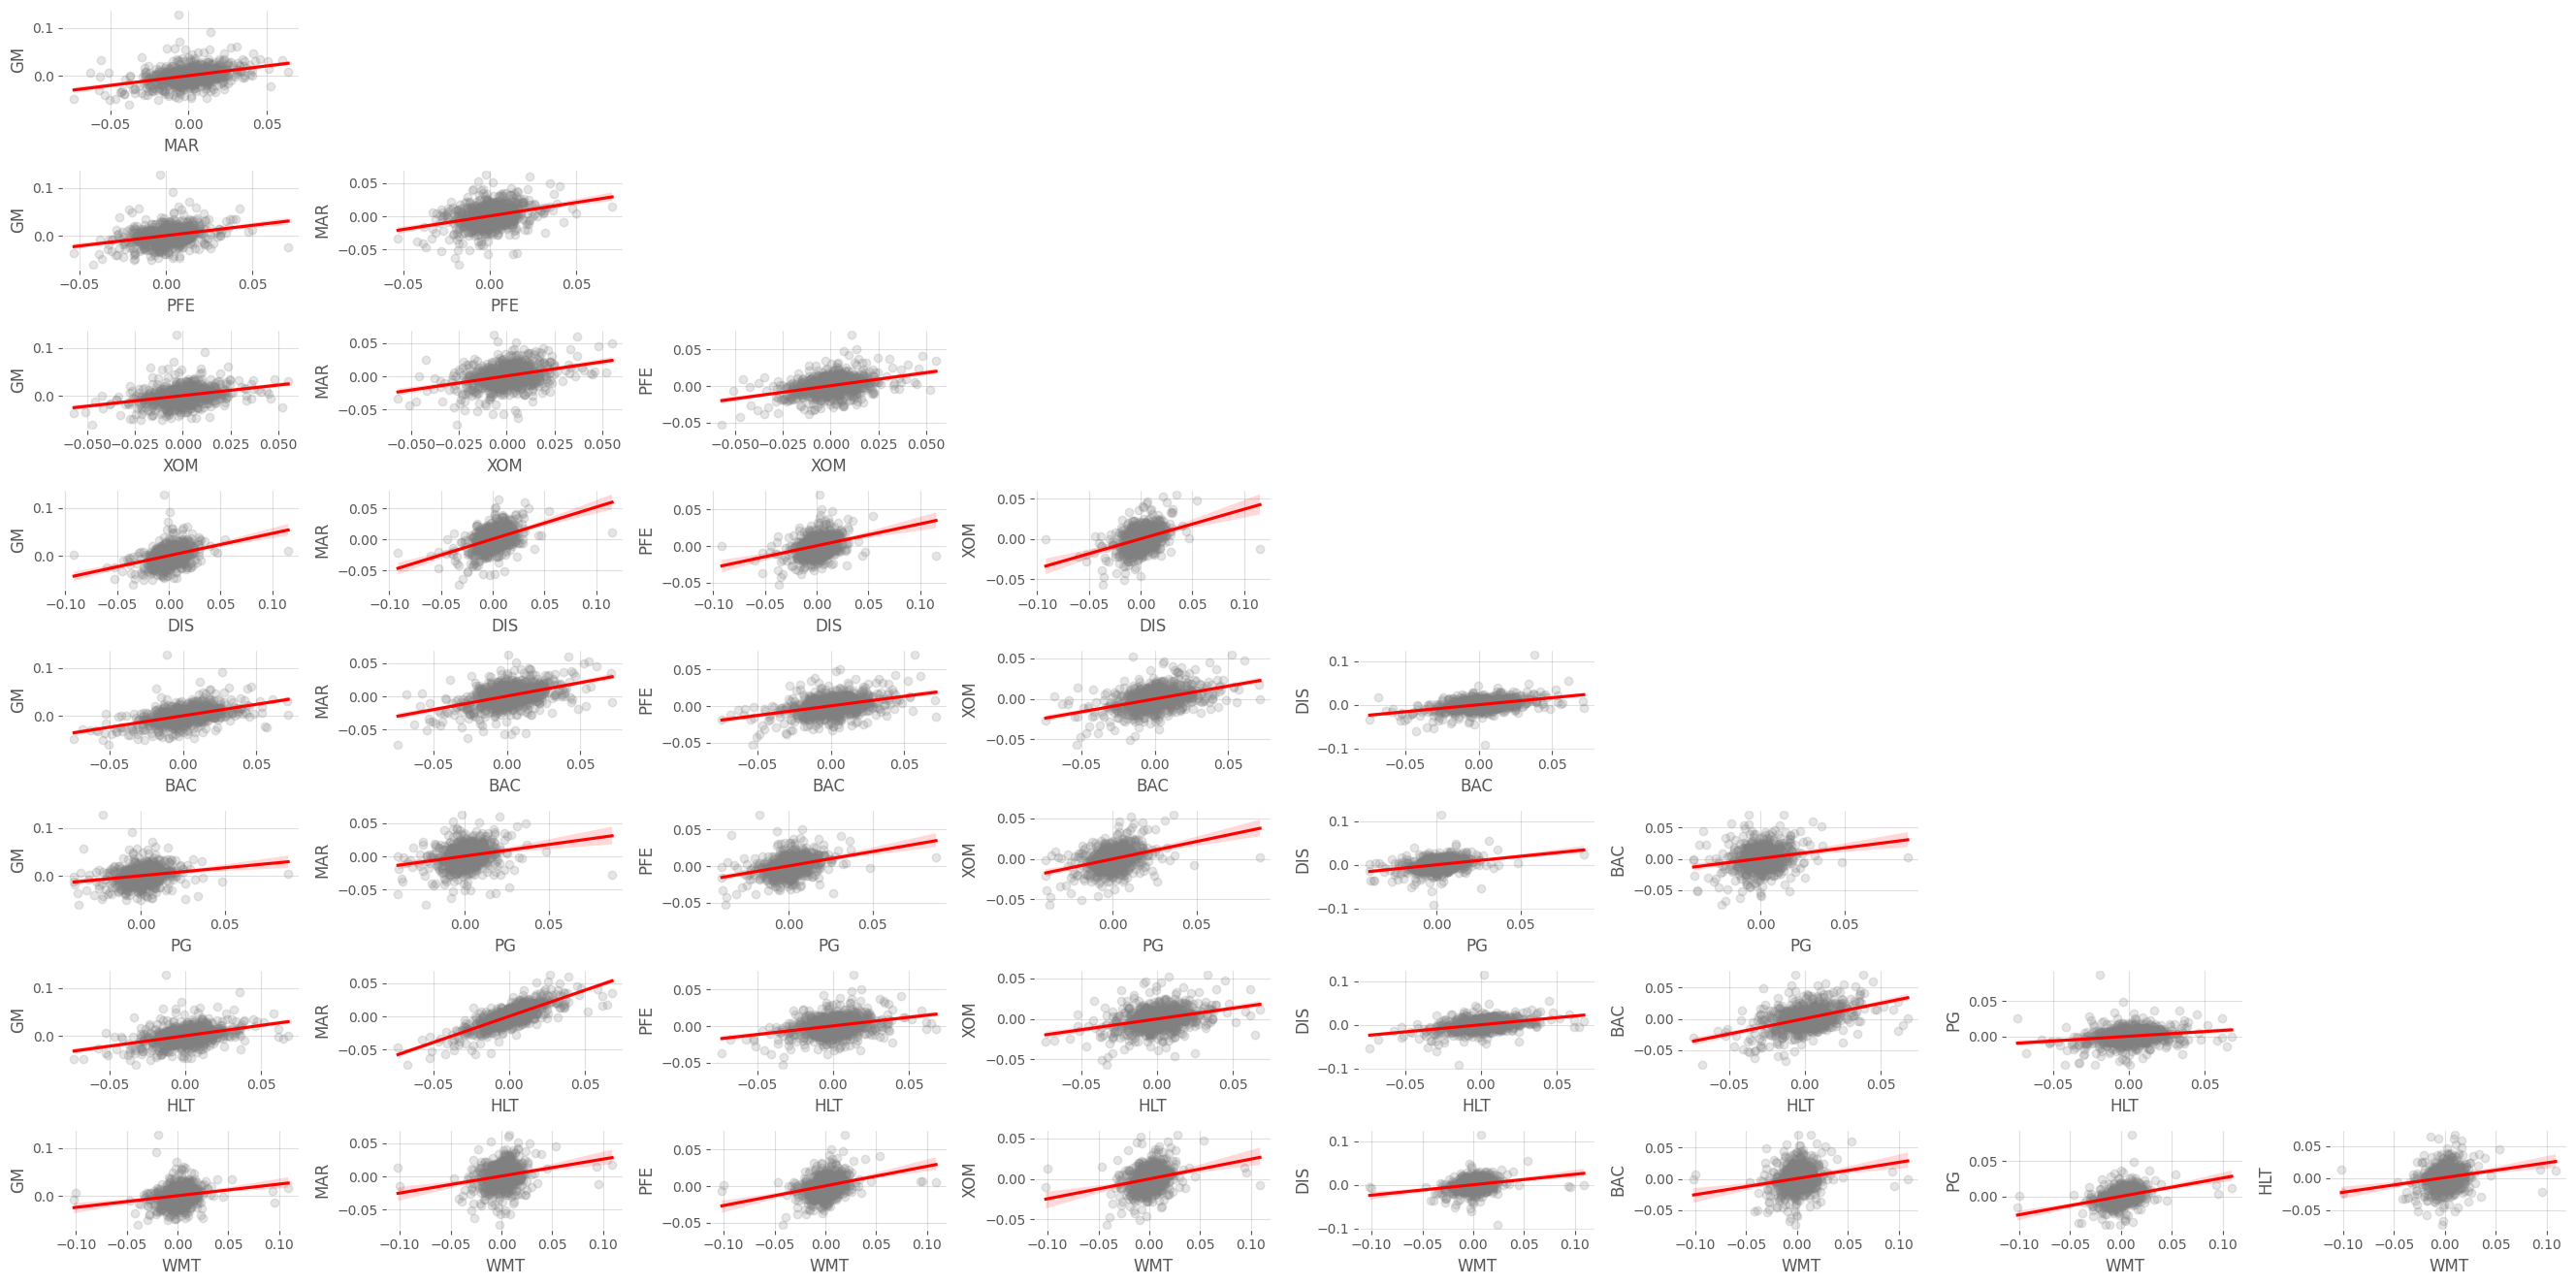

In [71]:
n = len(ticker_list)

fig, axes = plt.subplots(n, n, figsize=(30, 15))

for i in range(n):
    ticker_one = ticker_list[i]
    for j in range(n):
        if i > j: 
            ticker_two = ticker_list[j]
            sns.regplot(
                data = returns,
                x = ticker_one,
                y = ticker_two,
                ax = axes[i, j],
                line_kws = {'color': 'red'},
                scatter_kws = {'color': 'grey', 'alpha': 0.2}
            )
        elif i == j or i < j:
            axes[i, j].set_visible(False)

plt.tight_layout()
plt.show()

### <font color = red> Answer 5 is presented in the cell below: </font>

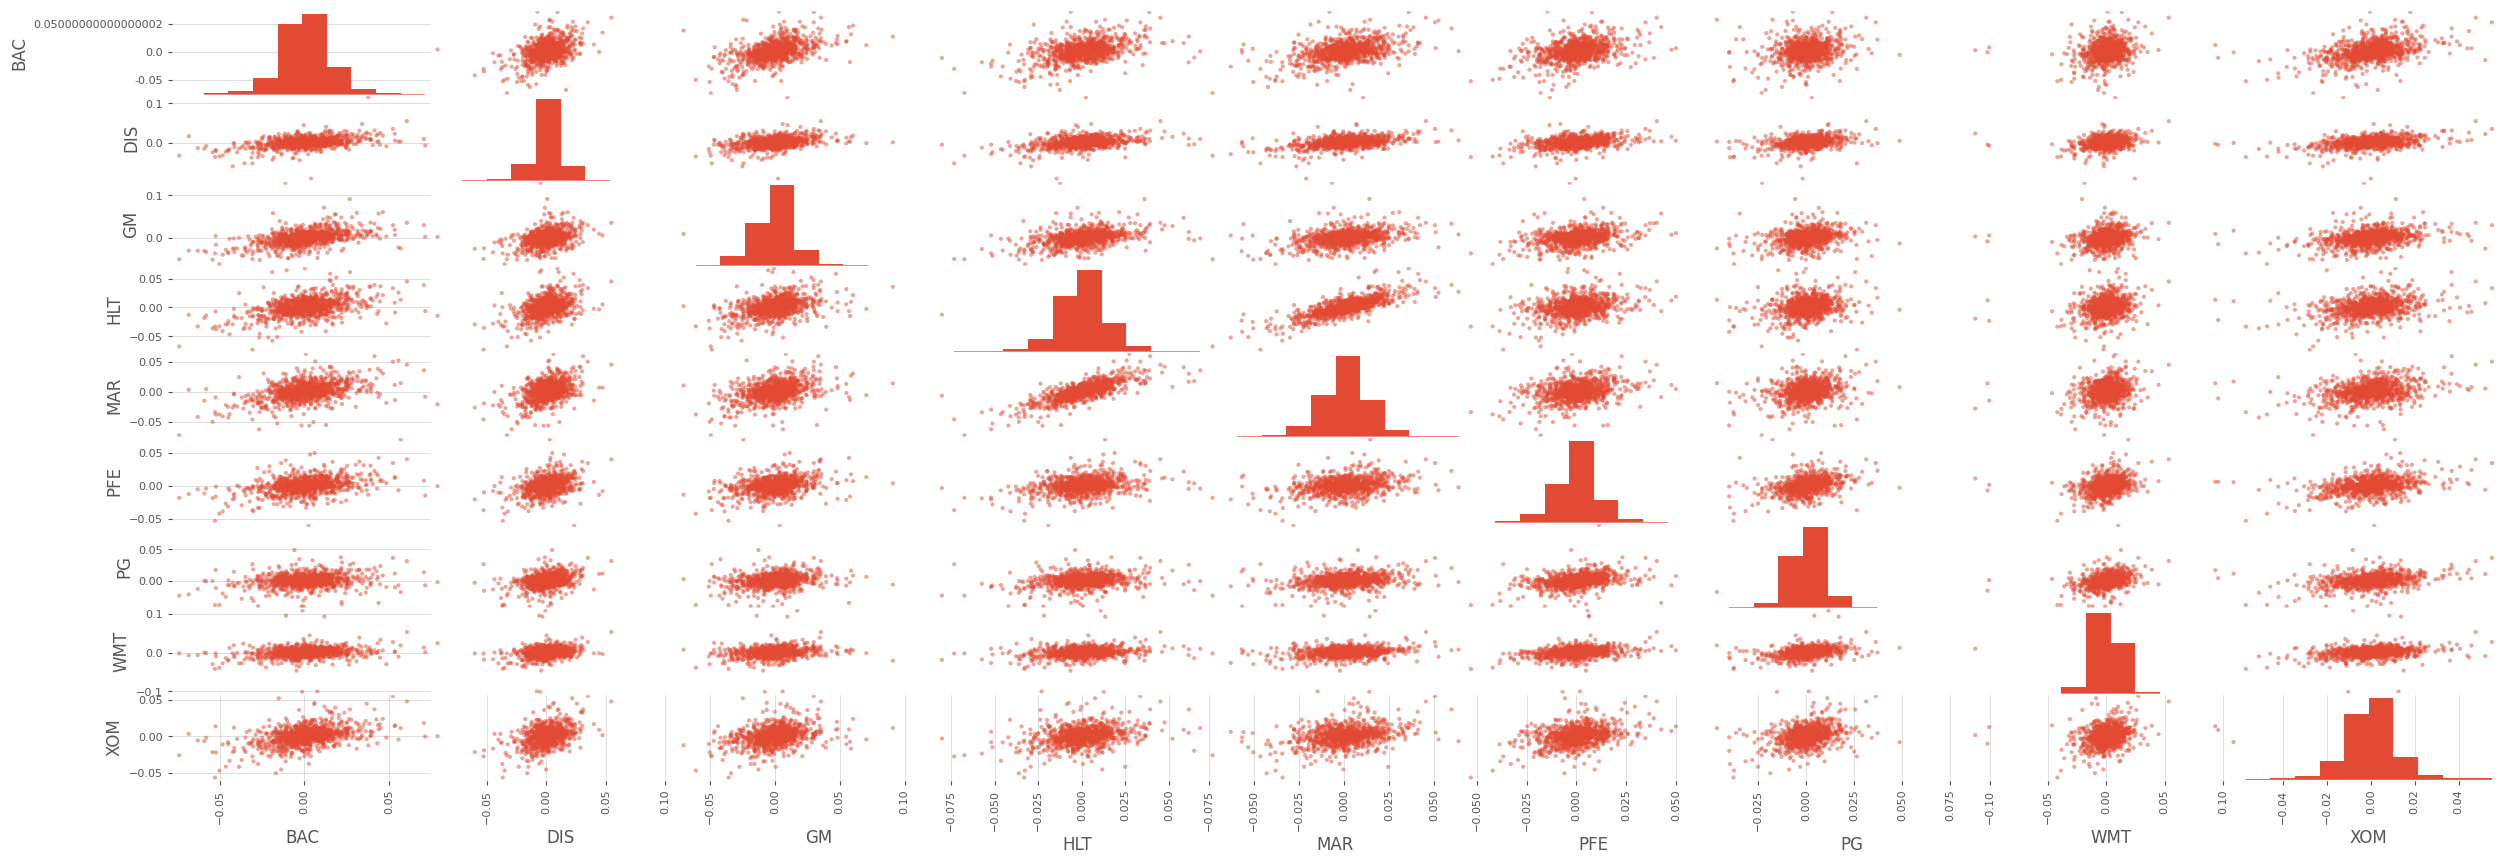

In [72]:
(
    pd.plotting
    .scatter_matrix(
        returns.dropna(), 
        figsize = (30,10)
    )
);

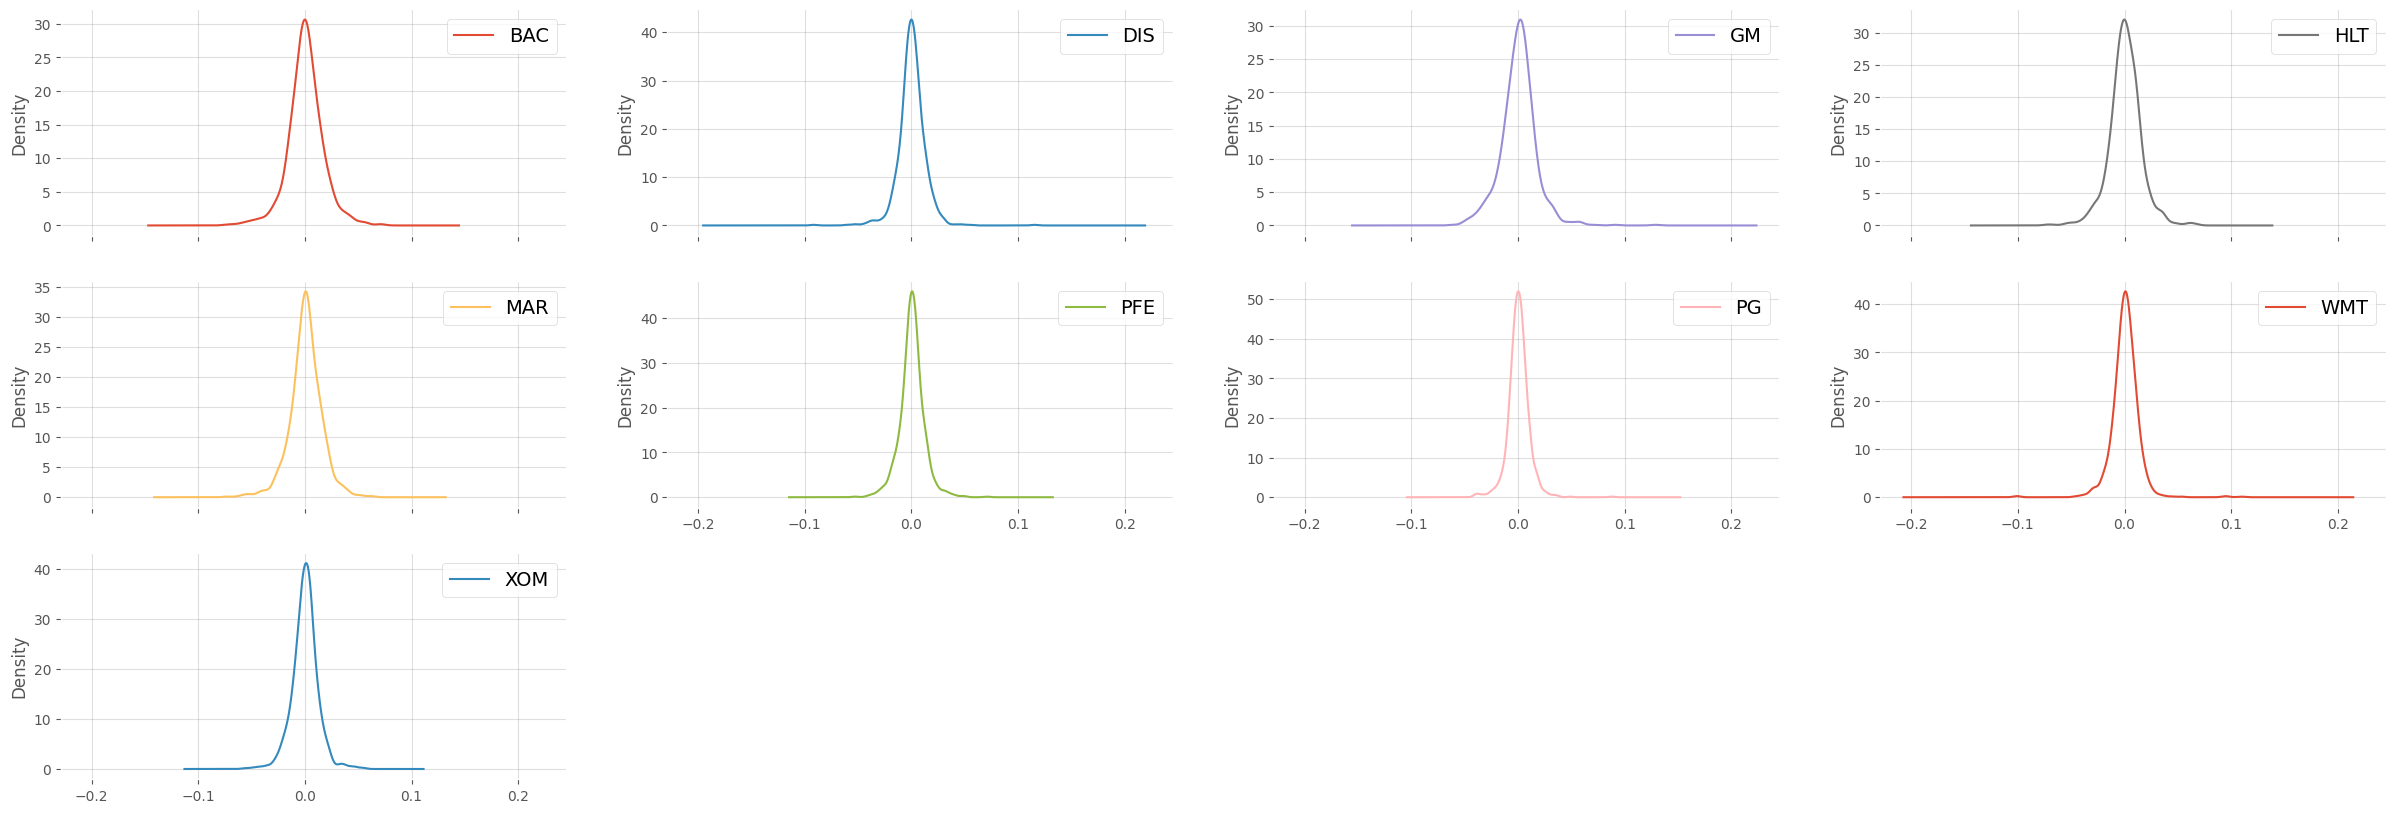

In [73]:
(
    returns
    .dropna()
    .plot(kind = "density",
         subplots = True,
         layout = (3, 4),
         sharex = True,
         legend = True,
         figsize = [30, 10]
        )
);

### <font color = blue> 👉 Question 6. It is often useful to analyze stock performance against a market index such as the S&P 500. This will give a sense of how a stock price compares to movements in the overall market.

### Carry out the following analysis steps.

<font color = green>

> ### 1. Extract the S&P 500 (`^GSPC`) data for the same time period used for the stocks in Question 1.

> ### 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes and cumulative returns on the index. You might first want to concatenate the index calculations in the results of the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently compare the overall set of stocks and index calculations for daily percentage changes.

> ### 3. Calculate the cumulative daily returns.

> ### 4. To complete this analysis, calculate the correlation of the daily percentage change values.

> ### 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, in descending order.

</font> 
        
### Which stock price moved in the most similar way to the S&P 500? Which moved in the least similar way?

### Below are the lines of code that lead to an answer:

In [74]:
list_of_tickers = nasdaq100_components['Symbol'].to_list() + ['^GSPC']

compare = (
    ticker_info(
        tickers = list_of_tickers
    )
)

compare.download(
    start_date = '2009-12-31',
    end_date = '2019-12-31',
    variable = 'Adj Close'
)

[*********************100%***********************]  102 of 102 completed

6 Failed downloads:
['GEHC', 'ARM', 'CEG', 'DASH', 'GFS', 'ABNB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2009-12-31 -> 2019-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262235600, endDate = 1577768400")')


In [75]:
compare_returns = (
    compare
    .compute_returns(
        return_type = 'simple'
    )
)

print("Missing Values? =", 
      compare_returns
          .isnull()
          .values
          .any()
     )

missing_fractions = \
    compare_returns \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)
    
missing_fractions.head(10)
drop_list =\
    sorted(list(missing_fractions
                [missing_fractions > 0.3]
                .index)
           )
    
print(drop_list)

compare_returns =\
    compare_returns \
    .drop(labels= drop_list, 
          axis=1)

Missing Values? = True
['ABNB', 'ARM', 'CDW', 'CEG', 'CRWD', 'DASH', 'DDOG', 'GEHC', 'GFS', 'KHC', 'MDB', 'MRNA', 'PDD', 'PYPL', 'TEAM', 'TTD', 'ZS']


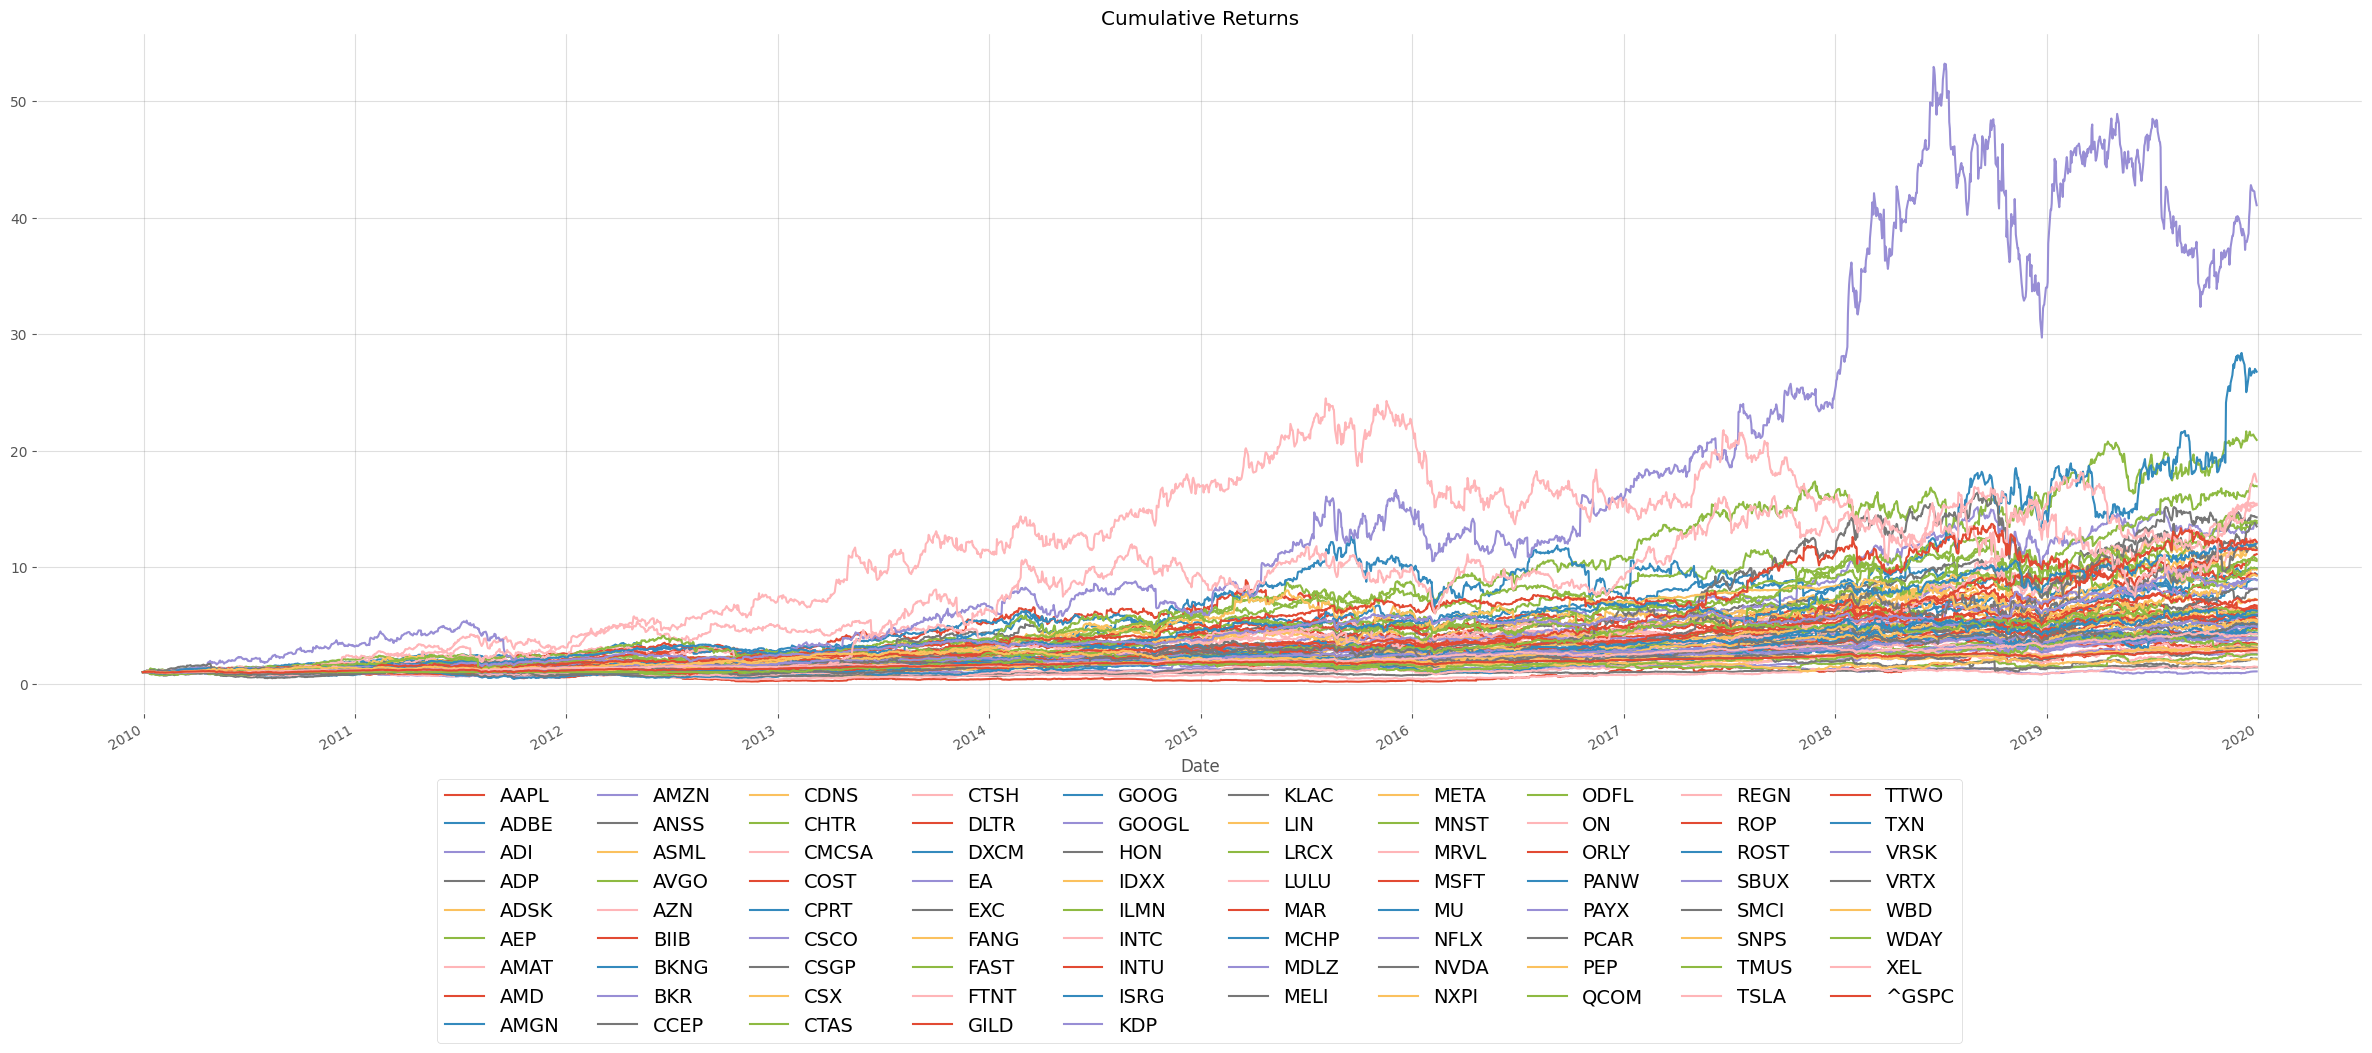

In [76]:
(
    (
        compare_returns
        .fillna(0) 
        + 1
    )
    .cumprod()
    .plot(
        figsize = (30, 10)
    )
)
plt.title('Cumulative Returns')
plt.legend(loc='lower center', ncol=10, bbox_to_anchor=(0.5, -0.5));

### <font color = red> Answer 6 is presented in the cell below: </font>

In [77]:
(
    compare_returns
    .corr()
    [['^GSPC']]
    .sort_values(
        by = '^GSPC',
        ascending = False
    )
)

Ticker,^GSPC
Ticker,
^GSPC,1.000000
HON,0.823112
ROP,0.766111
ADP,0.756600
PCAR,0.741191
...,...
PANW,0.381175
DLTR,0.368293
VRTX,0.365384


### <font color = blue> 👉 Question 7. One common type of data visualization in finance is a stock’s trading volume relative to its closing price.

### Create a chart below after obtaining the data from Yahoo Finance!, using `yfinance`. The target symbol is `AMZN`, and our period of interest is between January 2007 and December 2009. 

### Below are the lines of code that lead to an answer:

In [78]:
AMZN = (
    ticker_info(
        tickers = ['AMZN']
    )
)

(
    AMZN.download(
        start_date = '2006-12-31',
        end_date = '2009-12-31',
        variable = 'Close'
    )
)

AMZN_price = AMZN.price

(
    AMZN.download(
        start_date = '2006-12-31',
        end_date = '2009-12-31',
        variable = 'Volume'
    )
)

AMZN_volume = AMZN.price


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### <font color = red> Answer 7 is presented in the cell below: </font>

<Axes: xlabel='Date'>

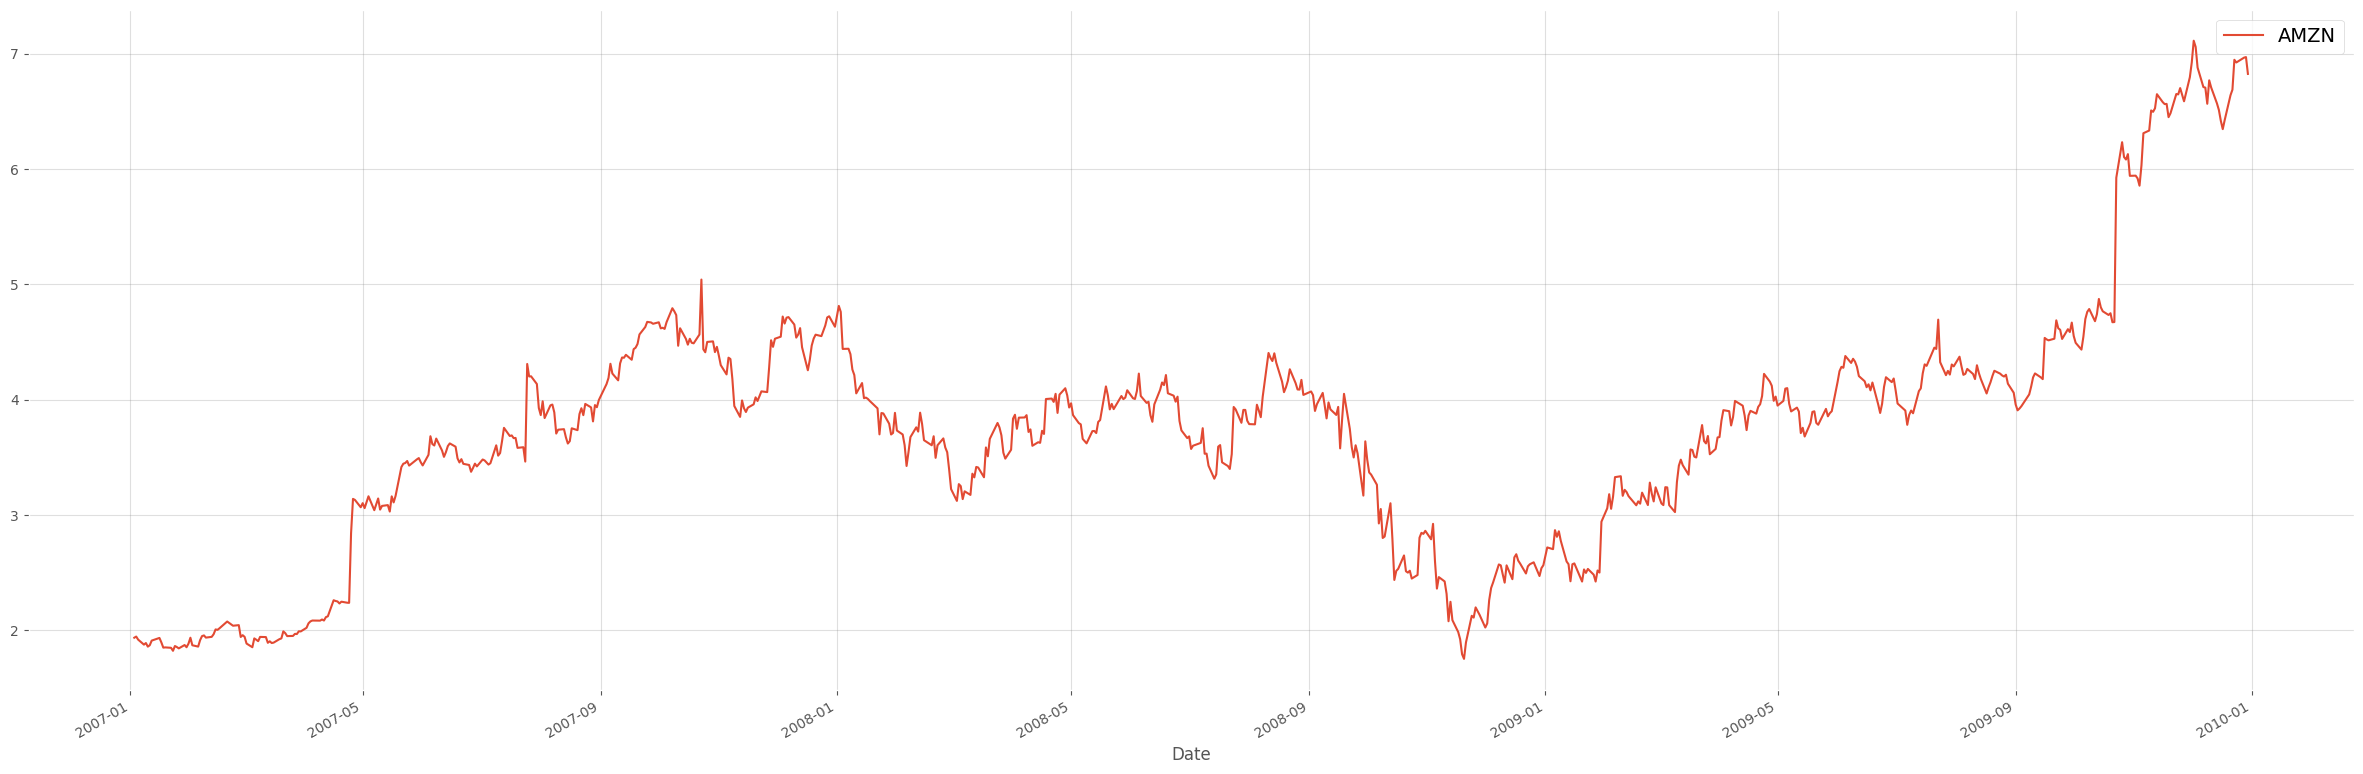

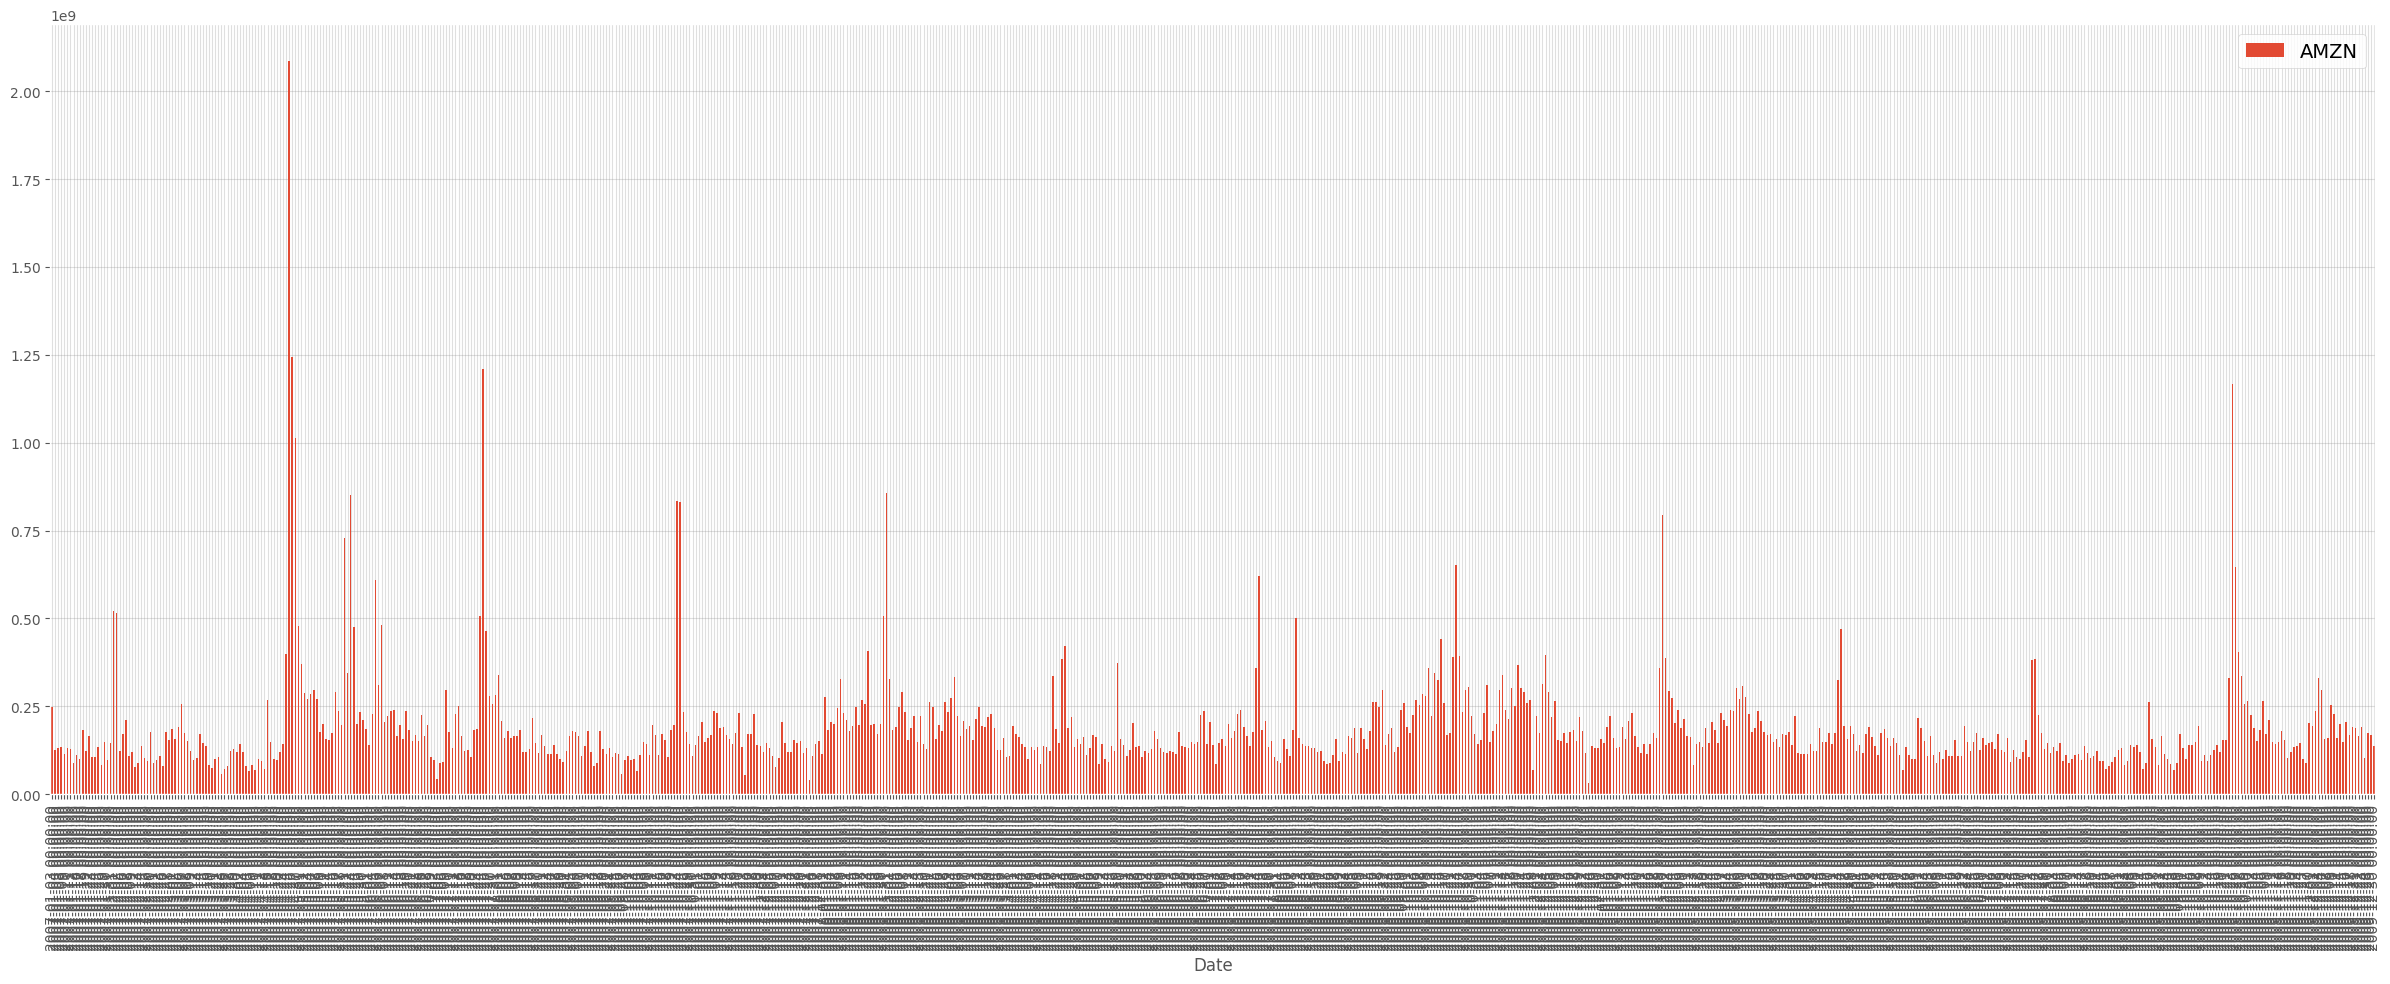

In [79]:
AMZN_price.plot(figsize = (30,10))
AMZN_volume.plot.bar(figsize = (30, 10))

## 👇 <font color = "purple"> Bigger Question 8. 

### Please create a predictive model for the weekly return of NFLX stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Netflix’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Netflix (NFLX). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (META, APPLE, AMZN, GOOGL);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of NFLX.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages;
* 10-day, 30-day, and 200-day relative strength index;
* stochastic oscillator %K and %D (using rolling windows of 10-, 30-, 200-day);
* rate of change (using 10-, 30-day past prices).
    
    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

    
* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning is not requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [80]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

# for time series
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

# for fred data

from pandas_datareader import data as pdr

In [81]:
class indicators:
    def __init__(
        self,
        df: pd.DataFrame,
        tickers: list
    ) -> None:
        """
        Computes technical indicators

        Parameters
        ----------
        df : pd.DataFrame
            DataFrame of prices with date as index
        """
        self.price = df[tickers]
        self.df = df
        self.tickers = tickers
    
    def SMA(
        self,
        windows: list[int]
    ) -> pd.DataFrame:
        """
        Compute simple moving average indicator

        Parameters
        ----------
        windows : list[int]
            Rolling windows
            
        Returns
        -------
        pd.DataFrame
            Moving Average DataFrame
            
        Raises
        ------
        TypeError
            If windows are not integer
        """
        if not isinstance(windows, list):
            raise AttributeError('Expected a list of windows')
                    
        if any(not isinstance(window, int) for window in windows):
            raise TypeError('Specify integer windows')
        
        SMA = (
            pd.concat(
                [
                    self.price
                    .rolling(window = window, min_periods = window)
                    .mean()
                    .rename(
                        columns = {
                            ticker : f'SMA_{window}_{ticker}'
                            for ticker in self.tickers
                        }
                    )
                    for window in windows
                ],
                axis = 1
            )
        )
        
        return SMA
        
    def EWMA(
        self,
        spans: list[int]
    ) -> pd.DataFrame:
        """
        Compute exponentially weighted moving average

        Parameters
        ----------
        spans : list[int]
            windows

        Returns
        -------
        pd.DataFrame
            EWMA DataFrame
            
        Raises
        ------
        TypeError
            If spans are not integer
        """
        if not isinstance(spans, list):
            raise AttributeError('Expected a list of spans')
            
        if any(not isinstance(span, int) for span in spans):
            raise TypeError('Specify integer spans')
        
        EWMA = (
            pd.concat(
                [
                    self.price
                    .ewm(span = span, min_periods = span)
                    .mean()
                    .rename(
                        columns = {
                            ticker : f'EWMA_{span}_{ticker}'
                            for ticker in self.tickers
                        }
                    )
                    for span in spans
                ],
                axis = 1
            )
        )
        
        return EWMA
    
    def RSI(
        self,
        n: int
    ) -> pd.DataFrame:
        """
        Relative strength index

        Parameters
        ----------
        n : int
            window

        Returns
        -------
        pd.DataFrame
            RSI DataFrame
            
        Raises
        ------
        TypeError
            If n is not integer
        """
        if not isinstance(n, int):
            raise TypeError('Specify integer window')
        
        delta = (
            self.price
            .diff()
        )
        
        gain = (
            delta
            .where(
                delta > 0,
                0
            )
            .rolling(window = n)
            .mean()
        )
        
        loss = (
            delta
            .where(
                delta < 0,
                0
            )
            .abs()
            .rolling(window = n)
            .mean()
        )
        
        RS = gain / loss
        
        RSI = 100 - 100 / (1 + RS)
        
        RSI = (
            RSI
            .rename(
                columns = {
                    ticker : f'RSI_{n}_{ticker}'
                    for ticker in self.tickers
                }
            )
        )

        return RSI
        
    def MACD(
        self,
        short: int,
        long: int,
        signal: int
        ) -> pd.DataFrame:
        """
        Moving average convergence divergence

        Parameters
        ----------
        short : int
            Short Window
        long : int
            Long Window
        signal : int
            MACD window

        Returns
        -------
        pd.DataFrame
            MACD + Signal Line DataFrame
            
        Raises
        ------
        TypeError
            If any short, long or signal is not integer
        """
        if any([not isinstance(n, int) for n in [short, long, signal]]):
            raise TypeError('Specify integer window')
        
        short_ewma = (
            self.price
            .ewm(span = short)
            .mean()
        )
        
        long_ewma = (
            self.price
            .ewm(span = long)
            .mean()
        )
        
        MACD = short_ewma - long_ewma
        
        MACD = (
            MACD
            .rename(
                columns = {
                    ticker : f'MACD_{ticker}'
                    for ticker in self.tickers
                }
            )
        )
        
        signal_line = (
            MACD
            .ewm(span = signal)
            .mean()
            .rename(
                columns = {
                    f'MACD_{ticker}' : f'signal_line_{ticker}'
                    for ticker in self.tickers
                }
            )
        )
        
        MACD = (
            pd.concat(
                [
                    MACD,
                    signal_line
                ],
                axis = 1
            )
        )
        
        return MACD
        
    def ROC(
        self, 
        n: int
    ) -> pd.DataFrame:
        """
        Rate of Change

        Parameters
        ----------
        n : int
            Window

        Returns
        -------
        pd.DataFrame
            ROC DataFrame
            
        Raises
        ------
        TypeError
            n must be integer
        """
        if not isinstance(n, int):
            raise TypeError('Specify integer n')
        
        M = self.price.diff(n - 1)
        N = self.price.shift(n - 1)
        ROC = (
            (M / N * 100)
            .rename(
                columns = {
                    f'{ticker}' : f'ROC_{n}_{ticker}'
                    for ticker in self.tickers
                }
            )
        )
        
        return ROC
        
    def MOM(
        self,
        n: int
    ) -> pd.DataFrame:
        """
        Momentum

        Parameters
        ----------
        n : int
            Window

        Returns
        -------
        pd.DataFrame
            MOM DataFrame
            
        Raises
        ------
        TypeError
            n must be integer
        """
        if not isinstance(n, int):
            raise TypeError('Specify integer n')
        
        MOM = (
            self.price
            .diff(n)
            .rename(
                columns = {
                    f'{ticker}' : f'MOM_{n}_{ticker}'
                    for ticker in self.tickers
                }
            )
        )
        
        return MOM
    
    def STOK(
        self,
        close: pd.DataFrame, 
        low: pd.DataFrame, 
        high: pd.DataFrame, 
        n: int
    ) -> pd.DataFrame:
        """
        Stochastic K

        Parameters
        ----------
        close : pd.DataFrame
            Close prices
        low : pd.DataFrame
            Low prices
        high : pd.DataFrame
            High prices
        n : int
            window

        Returns
        -------
        pd.DataFrame
            STOK DataFrame
            
        Raises
        ------
        ValueError
            Unequal length of DFs
        TypeError
            n must be integer
        """
        
        if len(close) != len(self.price) != len(low) != len(high):
            raise ValueError('length of df not equal')
        if not isinstance(n, int):
            raise TypeError('Specify integer n')
        
        STOK = (
            (
                (close - low.rolling(n).min()) 
                / 
                (high.rolling(n).max() - low.rolling(n).min())
                * 100
            ) 
            .rename(
                columns = {
                    f'{ticker}' : f'STOK_{n}_{ticker}'
                    for ticker in self.tickers
                }
            )
        )
        
        return STOK

    def STOD(
        self,
        close, 
        low, 
        high, 
        n
    ) -> pd.DataFrame:
        """
        Stochastic D

        Parameters
        ----------
        close : pd.DataFrame
            Close prices
        low : pd.DataFrame
            Low prices
        high : pd.DataFrame
            High prices
        n : int
            window

        Returns
        -------
        pd.DataFrame
            STOD DataFrame
            
        Raises
        ------
        ValueError
            Unequal length of DFs
        TypeError
            n must be integer
        """
        
        if len(close) != len(self.price) != len(low) != len(high):
            raise ValueError('length of df not equal')
        if not isinstance(n, int):
            raise TypeError('Specify integer n')
        
        STOK = (
            (
                (close - low.rolling(n).min()) 
                / 
                (high.rolling(n).max() - low.rolling(n).min())
                * 100
            ) 
            .rename(
                columns = {
                    f'{ticker}' : f'STOD_{n}_{ticker}'
                    for ticker in self.tickers
                }
            )
        )
        
        STOD = STOK.rolling(3).mean()
        
        return STOD
    
    def compute(
        self, 
        indicator: str,
        **kwargs
    ) -> None:
        """
        Computes specified indicators

        Parameters
        ----------
        indicator : str
            Name of indicator to compute

        Raises
        ------
        ValueError
            If indicator is not recognized
        """
        indicator = indicator.upper()
        
        if hasattr(self, indicator):
            TA = getattr(self, indicator)(**kwargs)
            self.df = (
                pd.concat(
                    [
                        self.df,
                        TA
                    ],
                    axis = 1
                )
            )
        else:
            raise ValueError(f"indicator '{indicator}' is not recognized.")

In [227]:
ml_stock_tickers = [
    'NFLX', 'META', 'AAPL', 'GOOGL', 'AMZN'
]

ml_currency_ticker = ['DEXJPUS', 'DEXUSUK']

ml_index_ticker = ['SP500', 'DJIA', 'VIXCLS']

stock_data = yf.download(ml_stock_tickers)
currency_data = pdr.get_data_fred(ml_currency_ticker)
index_data = pdr.get_data_fred(ml_index_ticker)

stock_data.index = stock_data.index.strftime("%Y-%m-%d").astype("datetime64[ns]")

[*********************100%***********************]  5 of 5 completed


In [228]:
return_period = 5

# Outcome (Y)

In [229]:
stock_data.loc[ : , ('Adj Close', 'NFLX')]

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2024-10-28    749.119995
2024-10-29    759.440002
2024-10-30    753.739990
2024-10-31    756.030029
2024-11-01    756.099976
Name: (Adj Close, NFLX), Length: 11065, dtype: float64

In [230]:
Y =\
    (np
     .log(stock_data.loc[ : , ('Adj Close', 'NFLX')]
         )
     .diff(return_period)
     .shift(-return_period)
    )
    
Y.name =\
    (Y
     .name[-1]
     +
     "_pred")

Y

Date
1980-12-12   NaN
1980-12-15   NaN
1980-12-16   NaN
1980-12-17   NaN
1980-12-18   NaN
              ..
2024-10-28   NaN
2024-10-29   NaN
2024-10-30   NaN
2024-10-31   NaN
2024-11-01   NaN
Name: NFLX_pred, Length: 11065, dtype: float64

### Input Features (Xs)

In [231]:
X1 =\
    (np.
     log(stock_data.loc[ : , ('Adj Close', ('META', 'AAPL', 'GOOGL', 'AMZN')
                             )
                       ]
        )
     .diff(return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X1.head()

Ticker,META,AAPL,GOOGL,AMZN
Date,,,,
1980-12-12,NaN,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN,NaN


In [232]:
X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X2.head()

,DEXJPUS,DEXUSUK
DATE,,
2019-11-04,NaN,NaN
2019-11-05,NaN,NaN
2019-11-06,NaN,NaN
2019-11-07,NaN,NaN
2019-11-08,NaN,NaN


In [233]:
X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X3.head()

,SP500,DJIA,VIXCLS
DATE,,,
2019-11-04,NaN,NaN,NaN
2019-11-05,NaN,NaN,NaN
2019-11-06,NaN,NaN,NaN
2019-11-07,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN


In [234]:
X4 = (
    pd
    .concat([np
             .log(stock_data.loc[ : , ('Adj Close', 'NFLX')
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ['NFLX_DT', 'NFLX_3DT', 'NFLX_6DT', 'NFLX_12DT']

X4.head()

,NFLX_DT,NFLX_3DT,NFLX_6DT,NFLX_12DT
Date,,,,
2002-08-19,0.260185,0.113881,-0.179894,-0.197360
2002-08-20,0.202602,0.034553,-0.204095,-0.245680
2002-08-21,0.150103,0.015608,-0.183427,-0.177888
2002-08-22,0.108027,0.098364,-0.255020,-0.115117
2002-08-23,0.084726,0.244763,-0.195297,-0.075443


In [235]:
NFLX_adj_close = stock_data.loc[ : , ('Adj Close', 'NFLX')].to_frame()
NFLX_adj_close.columns = NFLX_adj_close.columns.droplevel()

NFLX_close = stock_data.loc[ : , ('Close', 'NFLX')].to_frame()
NFLX_close.columns = NFLX_close.columns.droplevel()

NFLX_low = stock_data.loc[ : , ('Low', 'NFLX')].to_frame()
NFLX_low.columns = NFLX_low.columns.droplevel()

NFLX_High = stock_data.loc[ : , ('High', 'NFLX')].to_frame()
NFLX_High.columns = NFLX_High.columns.droplevel()

In [236]:
ind = indicators(
    df = NFLX_adj_close,
    tickers = ['NFLX']
)

ind.compute('SMA', windows = [21, 63, 252])
ind.compute('EWMA', spans = [10, 30, 200])

for n in [10, 30, 200]:
    ind.compute('RSI', n = n)

for n in [10, 30, 200]:
    ind.compute(
        'STOK',
        close = NFLX_close, 
        low = NFLX_low, 
        high = NFLX_High,
        n = n
    )
    
    ind.compute(
        'STOD',
        close = NFLX_close, 
        low = NFLX_low, 
        high = NFLX_High,
        n = n
    )
    
for n in [10, 30]:
    ind.compute('ROC', n = n)
    

In [237]:
X=\
(
    pd
    .concat([X1, X2, X3, X4, ind.df.drop(columns = 'NFLX')],
            axis = 1)
)

X

,META,AAPL,GOOGL,AMZN,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NFLX_DT,...,RSI_30_NFLX,RSI_200_NFLX,STOK_10_NFLX,STOD_10_NFLX,STOK_30_NFLX,STOD_30_NFLX,STOK_200_NFLX,STOD_200_NFLX,ROC_10_NFLX,ROC_30_NFLX
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,0.005202,-0.013110,0.016023,-0.003603,NaN,NaN,-0.005217,-0.012753,0.074963,-0.030176,...,58.371511,57.702525,74.894863,78.746136,74.894863,78.746136,91.979578,93.225859,6.110657,5.971060
2024-10-29,0.019179,-0.009329,0.027121,0.005939,NaN,NaN,-0.003129,-0.016249,0.060754,-0.006301,...,58.359591,57.965098,85.744325,80.459766,85.744325,80.459766,95.445692,93.757416,8.182337,9.988853
2024-10-30,0.048664,-0.002864,0.069296,0.042503,NaN,NaN,0.002799,-0.008822,0.056089,0.005921,...,60.425108,58.146001,79.751881,80.130356,79.751881,80.130356,93.531265,93.652178,9.610989,7.016694
2024-10-31,-0.000352,-0.020418,0.050276,0.000107,NaN,NaN,-0.018135,-0.014522,0.193786,0.001960,...,58.857787,58.234867,53.848350,73.114852,82.159408,82.551871,94.285051,94.420669,-1.028942,7.845598


In [238]:
data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

In [239]:
X = (
    data
    .drop(columns = 'NFLX_pred')
)
Y = (
    data
    [['NFLX_pred']]
)

len(X) == len(Y)

True

In [240]:
validation_size = 0.25

train_size =\
    int(
        len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (
        X[0         :train_size].to_numpy(), 
        X[train_size:len(X)    ].to_numpy()
    )

Y_train, Y_test =\
    (
        Y[0         :train_size].to_numpy().flatten(), 
        Y[train_size:len(X)    ].to_numpy().flatten()
    )

In [241]:
seed = 241001
scoring = "neg_mean_squared_error"
models = []
num_folds = 10

models.append(("LR", LinearRegression()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("SVR", SVR()
             )
            )
# Bagging (Boostrap Aggregation)

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

In [243]:
# Gift for you

# Team, let me guide you through this step-by-step

### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = []

# Four empty lists are initialized. 
# names will store the names of the models, 
# kfold_results will store the cross-validation results, 
# train_results and test_results 
# will store the performance of the models 
# on the training and testing datasets, respectively.

### Looping through Models:

# Let's iterate over a list of models. 

# Each element in the models list is a tuple 
# containing the name of the model (name) and the model object (model).

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.

    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.006410 (0.004291) 0.004131 0.003697
LASSO: 0.005297 (0.004415) 0.005198 0.001915
EN: 0.005251 (0.004347) 0.005108 0.002045
CART: 0.009545 (0.006933) 0.000000 0.011469
KNN: 0.006038 (0.003785) 0.004379 0.002747
SVR: 0.005817 (0.004301) 0.005222 0.002452
RFR: 0.006089 (0.005476) 0.001020 0.004343
ETR: 0.006267 (0.004644) 0.000000 0.003244
GBR: 0.007135 (0.006550) 0.000182 0.003531
ABR: 0.005884 (0.005559) 0.001706 0.002118


In [221]:
modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()
error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = len(X_train) - 1,
             end = len(X) - 1,
             exog = X_test)[1: ]
)
error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA
test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

C:\Users\Edmund\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### <font color = red> Answer 8 is presented in the cell below: </font>

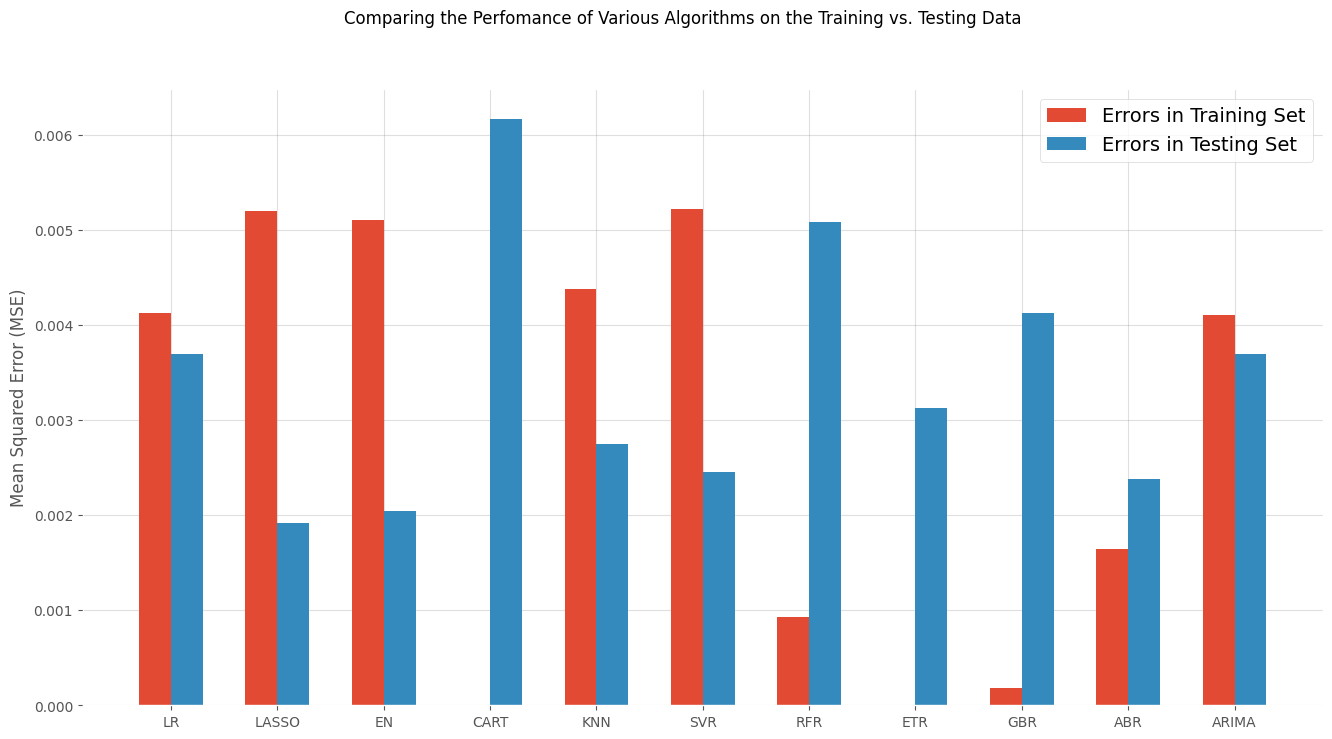

In [222]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

Text(0, 0.5, 'Predicted Values')

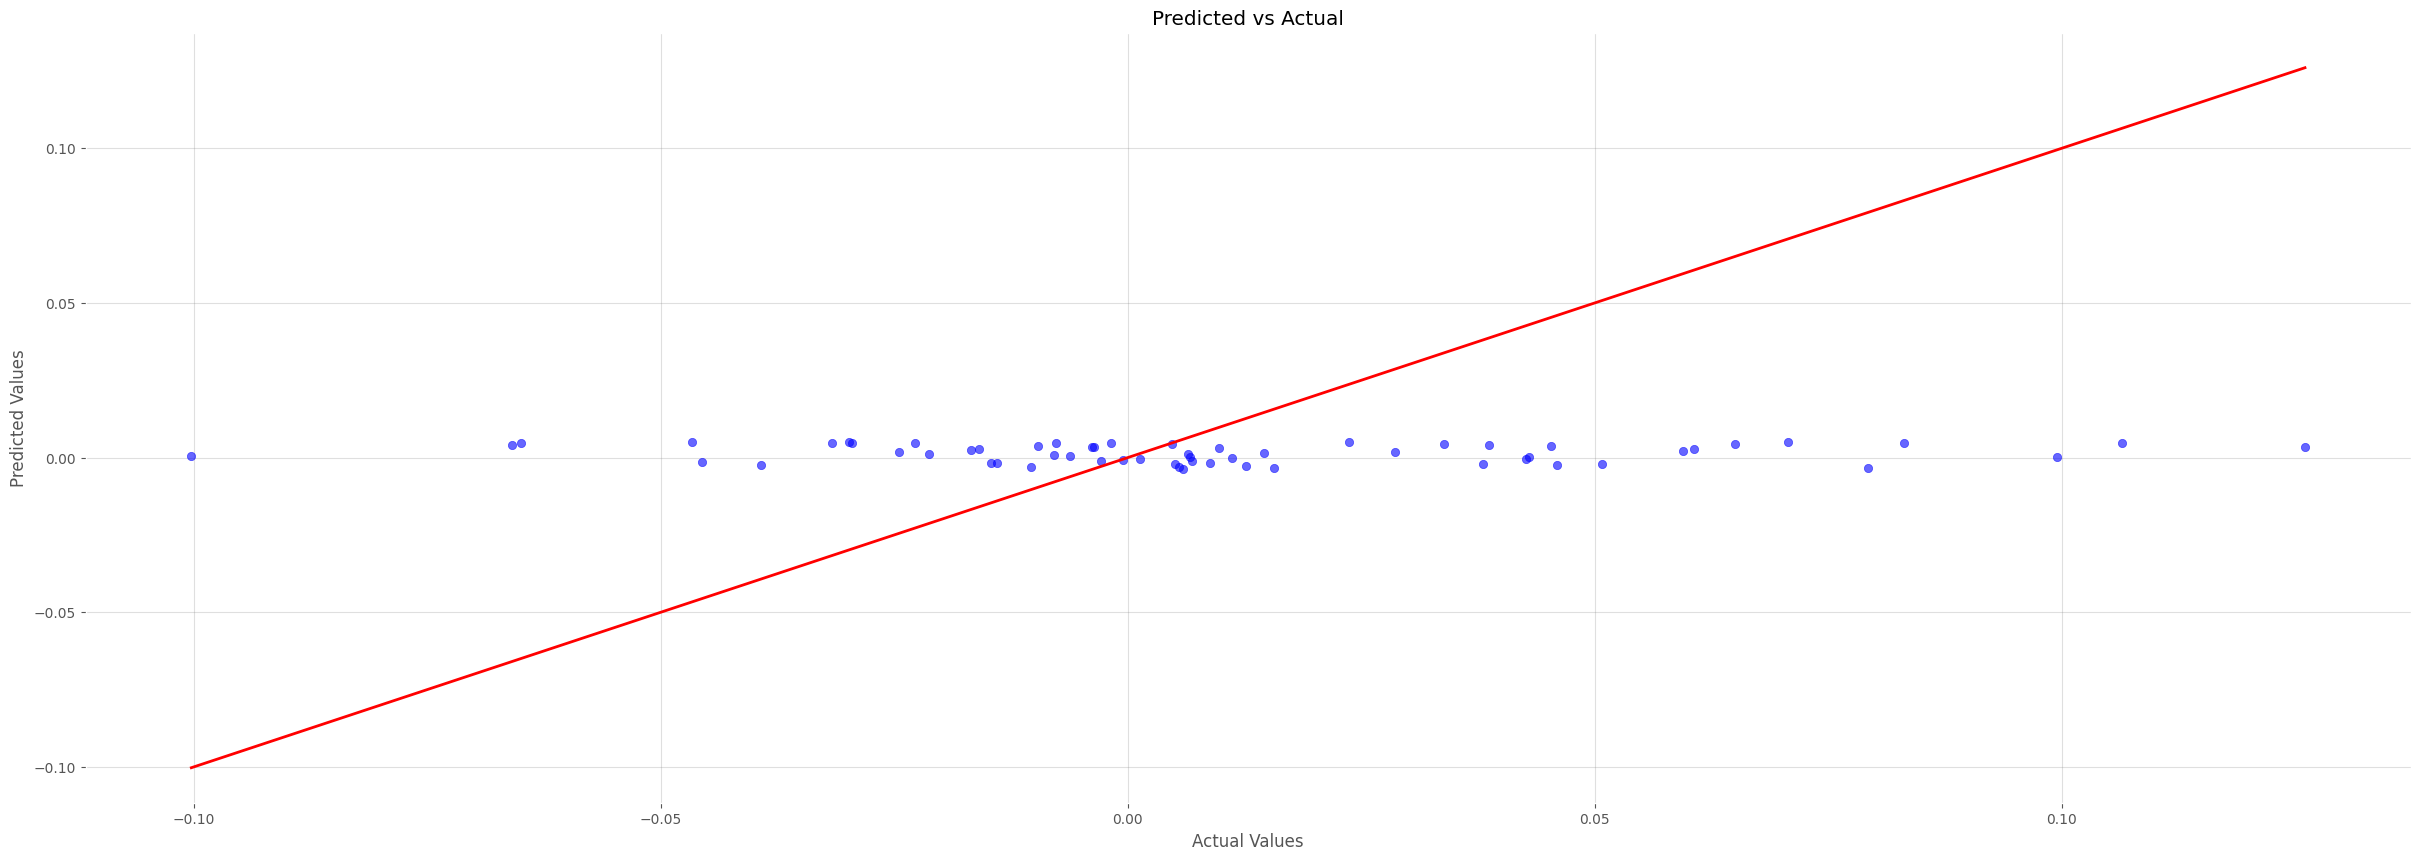

In [223]:
best_model = 'LASSO'

model = next((model for name, model in models if name == best_model), None)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

model_prediction = (
    pd.DataFrame
    .from_dict(
        {
            'Pred': Y_pred,
            'Actual': Y_test.flatten()
        },
        orient = 'columns'
    )
)

plt.figure(figsize=(30, 10))
plt.scatter(x = Y_test, y = Y_pred, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊